In [1]:
!pip install -q kaggle

from google.colab import files

files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"khueluong","key":"fa07b2a99eed1f69c6833a094a309ef6"}'}

In [2]:
!mkdir ~/.kaggle

!cp kaggle.json ~/.kaggle/

! chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d imakash3011/customer-personality-analysis

  0% 0.00/62.0k [00:00<?, ?B/s]
100% 62.0k/62.0k [00:00<00:00, 64.7MB/s]


In [4]:
!unzip -q customer-personality-analysis.zip

In [5]:
pip install squarify

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact
import seaborn as sns
import squarify
import warnings
from datetime import datetime
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.model_selection import train_test_split
from sklearn.compose import make_column_transformer, make_column_selector
from sklearn.impute import KNNImputer
from sklearn.preprocessing import FunctionTransformer, OneHotEncoder, StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score, silhouette_samples, davies_bouldin_score

In [7]:
df = pd.read_csv('/content/marketing_campaign.csv',sep="\t")

In [8]:
warnings.filterwarnings('ignore')

In [9]:
pd.set_option('display.max_columns', 50)
pd.set_option('display.max_rows', 50)

In [10]:
print('Rows:',df.shape[0])
print('Columns:',df.shape[1])

Rows: 2240
Columns: 29


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2240 entries, 0 to 2239
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   ID                   2240 non-null   int64  
 1   Year_Birth           2240 non-null   int64  
 2   Education            2240 non-null   object 
 3   Marital_Status       2240 non-null   object 
 4   Income               2216 non-null   float64
 5   Kidhome              2240 non-null   int64  
 6   Teenhome             2240 non-null   int64  
 7   Dt_Customer          2240 non-null   object 
 8   Recency              2240 non-null   int64  
 9   MntWines             2240 non-null   int64  
 10  MntFruits            2240 non-null   int64  
 11  MntMeatProducts      2240 non-null   int64  
 12  MntFishProducts      2240 non-null   int64  
 13  MntSweetProducts     2240 non-null   int64  
 14  MntGoldProds         2240 non-null   int64  
 15  NumDealsPurchases    2240 non-null   i

In [12]:
df.select_dtypes('object').nunique()

Education           5
Marital_Status      8
Dt_Customer       663
dtype: int64

In [13]:
df.describe()

,ID,Year_Birth,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
count,2240.000000,2240.000000,2216.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.000000,2240.0,2240.0,2240.000000
mean,5592.159821,1968.805804,52247.251354,0.444196,0.506250,49.109375,303.935714,26.302232,166.950000,37.525446,27.062946,44.021875,2.325000,4.084821,2.662054,5.790179,5.316518,0.072768,0.074554,0.072768,0.064286,0.013393,0.009375,3.0,11.0,0.149107
std,3246.662198,11.984069,25173.076661,0.538398,0.544538,28.962453,336.597393,39.773434,225.715373,54.628979,41.280498,52.167439,1.932238,2.778714,2.923101,3.250958,2.426645,0.259813,0.262728,0.259813,0.245316,0.114976,0.096391,0.0,0.0,0.356274
min,0.000000,1893.000000,1730.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
25%,2828.250000,1959.000000,35303.000000,0.000000,0.000000,24.000000,23.750000,1.000000,16.000000,3.000000,1.000000,9.000000,1.000000,2.000000,0.000000,3.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
50%,5458.500000,1970.000000,51381.500000,0.000000,0.000000,49.000000,173.500000,8.000000,67.000000,12.000000,8.000000,24.000000,2.000000,4.000000,2.000000,5.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
75%,8427.750000,1977.000000,68522.000000,1.000000,1.000000,74.000000,504.250000,33.000000,232.000000,50.000000,33.000000,56.000000,3.000000,6.000000,4.000000,8.000000,7.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.0,11.0,0.000000
max,11191.000000,1996.000000,666666.000000,2.000000,2.000000,99.000000,1493.000000,199.000000,1725.000000,259.000000,263.000000,362.000000,15.000000,27.000000,28.000000,13.000000,20.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.0,11.0,1.000000


In [14]:
print("Duplicated records:",df.duplicated().sum())

Duplicated records: 0


In [15]:
df.Education.value_counts(dropna=False, normalize=True)

Graduation    0.503125
PhD           0.216964
Master        0.165179
2n Cycle      0.090625
Basic         0.024107
Name: Education, dtype: float64

In [16]:
df.Marital_Status.value_counts(dropna=False, normalize=True)

Married     0.385714
Together    0.258929
Single      0.214286
Divorced    0.103571
Widow       0.034375
Alone       0.001339
Absurd      0.000893
YOLO        0.000893
Name: Marital_Status, dtype: float64

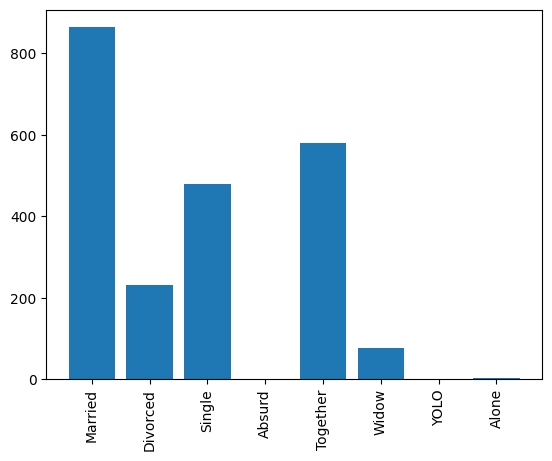

In [17]:
l,a = list(set(df["Marital_Status"])),[]
for i in range(len(l)):
    a.append(df["Marital_Status"].to_list().count(l[i]))
plt.bar(x=range(len(l)),height = a)
plt.xticks(labels=l,ticks=range(len(l)), rotation=90)
plt.show()

In [18]:
last_year = pd.to_datetime(df.Dt_Customer, format='%d-%m-%Y').dt.year.max()
print("Thời điểm gần nhất: ",last_year)

Thời điểm gần nhất:  2014


In [19]:
# Let's make a copy of the dataset
df_copy = df.copy()

In [20]:
def initial_cleaning(df):
    """Do the initial changes describe it above"""
    # Drop columns
    df.drop(['ID','Z_CostContact','Z_Revenue'], axis=1, inplace=True)
    # Transform the format of dt_customer
    df['Dt_Customer'] = pd.to_datetime(df['Dt_Customer'],format="%d-%m-%Y")
    # Substitutions in Marital Status column
    df['Marital_Status'] = df.loc[:,'Marital_Status'].str.replace('Alone','Single')
    #df['Marital_Status'] = df.loc[:,'Marital_Status'].apply(lambda x: "Single" if x == 'YOLO' or x == 'Absurd' else x)
    #df['Marital_Status'] = df.loc[:,'Marital_Status'].apply(lambda x: "Single" if x == 'YOLO' or x == 'Absurd' else x)
    rows_to_drop = df[df['Marital_Status'].isin(['YOLO', 'Absurd'])].index
    df.drop(rows_to_drop, inplace=True)
    # Rename columns for more practicity
    df.columns = df.columns.str.lower()
    # Create new column
    df['younghome'] = df.kidhome + df.teenhome
    return df

df_copy = initial_cleaning(df_copy)

In [21]:
def feat_engineering(df):
    #not_graduated = ['Basic','2n cycle']
    couple = ['Married','Together']
    df['age'] = max(df['dt_customer'].dt.year) - df['year_birth']
    #df['graduated'] = df['education'].apply(lambda x: 'Not Graduated' if x in not_graduated else 'Graduated')
    df['partner'] = df['marital_status'].apply(lambda x: 'Partner' if x in couple else 'No Partner')
    return df

In [22]:
df_copy = feat_engineering(df_copy);

In [23]:
df_copy.marital_status.value_counts(dropna=False, normalize=True)

Married     0.386404
Together    0.259392
Single      0.216011
Divorced    0.103757
Widow       0.034436
Name: marital_status, dtype: float64

In [24]:
sns.set_theme(context= 'notebook')
sns.set_style('dark')
sns.set(rc={'axes.grid':False})
sns.set_palette('mako')

In [25]:
def num_plot(df, col):
  """Graph an histogram with a boxplot above
	for one numerical column"""
  fig, ax = plt.subplots(2, 1, sharex=True, figsize=(8,4),gridspec_kw={"height_ratios": (.2, .8)})
  sns.boxplot(x=col, data=df, ax=ax[0], color='#7171cf', linewidth=1.5)
  ax[0].set_xlabel(None)
  ax[0].set(yticks=[])
  sns.histplot(x=col, data=df, ax=ax[1], alpha=.6, color='#7171cf')
  ax[1].set_xlabel(col.replace('_',' ').title(), fontsize=22, loc= 'left')
  plt.axvline(df[col].mean(), color='#39568CFF', linewidth=2.2, label='mean=' + str(np.round(df[col].mean(),1)))
  plt.axvline(df[col].median(), color='#1F968BFF', linewidth=2.2, label='median='+ str(np.round(df[col].median(),1)))
  plt.axvline(df[col].mode()[0], color='#440154FF', linewidth=2.2, label='mode='+ str(df[col].mode()[0]))
  plt.legend(bbox_to_anchor=(1, 1.03), ncol=1, fontsize=10, fancybox=True, shadow=True, frameon=True)
  plt.tight_layout()
  return ax

def countplot_catcols(df,column,width,height):
	"""Count frequency for each group"""
	fig, ax  = plt.subplots(figsize=(width,height))
	ax=sns.countplot(y=column, data=df,
                  palette='viridis',
                  orient='h',
				  order = df[column].value_counts().index)
	ax.set_xticklabels(ax.get_xticklabels())
	ax.bar_label(ax.containers[0])
	ax.set_title(f'Frequency of {column} categories', loc='left', size=18)
	plt.tight_layout()
	return ax

def barplot_category(df,x,y,title):
  """Plot a barplot"""
  fig, ax  = plt.subplots(figsize=(8,2))
  ax  = sns.barplot(data=df, x=x, y=y,
              orient='h', palette='mako',
              seed=2)
  plt.title(title, loc='left', size=16)
  return ax

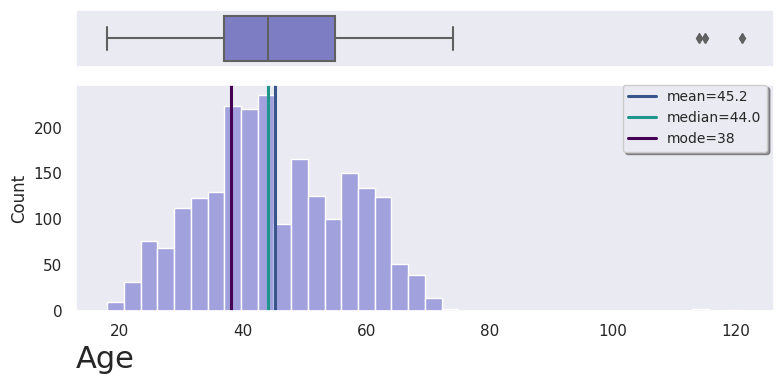

In [26]:
num_plot(df_copy, 'age')
plt.show()

In [27]:
age_clusters = pd.cut(df_copy.age, [-np.inf,30,60,np.inf],
                      labels=['young','adult','elderly'])
age_clusters.value_counts(normalize=True).sort_index()

young      0.115385
adult      0.764311
elderly    0.120304
Name: age, dtype: float64

In [28]:
df_copy['age_category'] = age_clusters

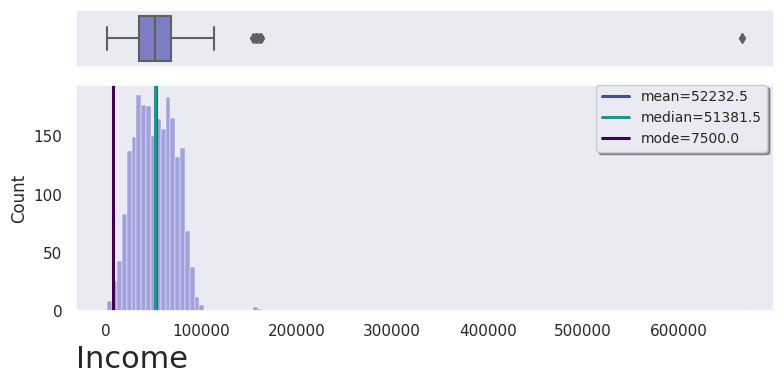

In [29]:
num_plot(df_copy, 'income')
plt.show()

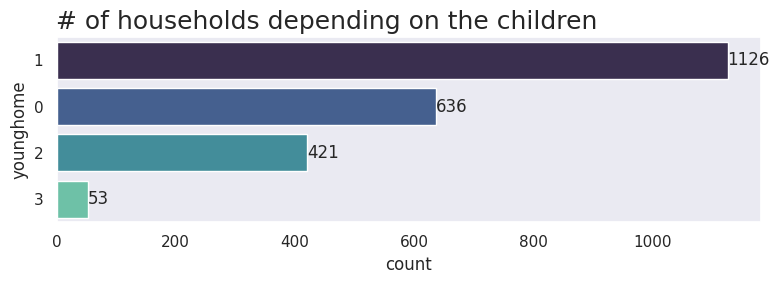

In [30]:
fig, ax  = plt.subplots(figsize=(8,3))
ax=sns.countplot(y='younghome', data=df_copy,
                  palette='mako',
                  orient='h',
				  order = df_copy['younghome'].value_counts().index)
ax.set_xticklabels(ax.get_xticklabels())
ax.bar_label(ax.containers[0])
ax.set_title('# of households depending on the children', loc='left', size=18)
plt.tight_layout()
plt.show()

In [31]:
# Select only a few features of interest at this moment
products_subset = df_copy.loc[:, :'mntgoldprods'].drop(['kidhome','teenhome','year_birth'], axis=1)
demographic_subset = df_copy[['age','age_category','partner']]

purchase = pd.concat([products_subset, demographic_subset], axis=1)

# Create a new column with the total amount of products pruchased
purchase['mnttotal'] = purchase.loc[:,'mntwines':'mntgoldprods'].sum(1)

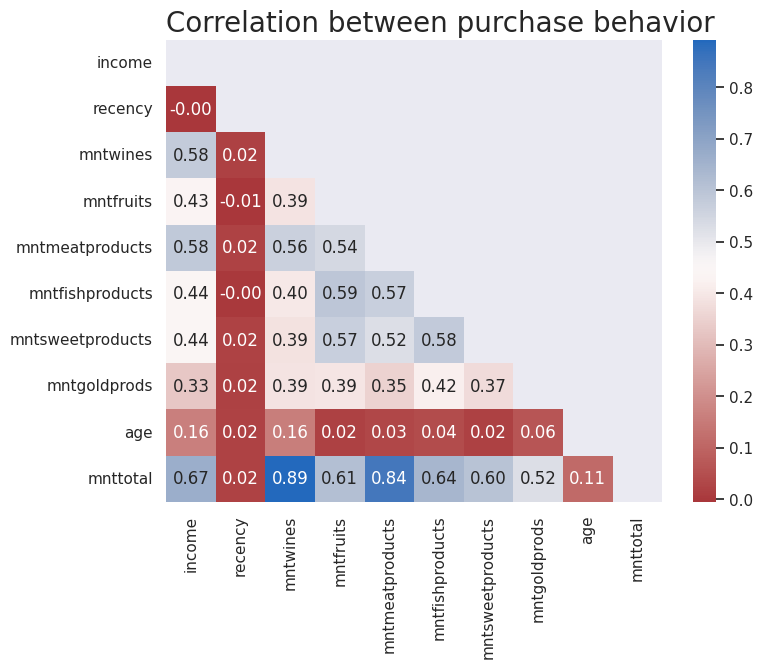

In [32]:
purchase_numbers = purchase.select_dtypes('number')
plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(purchase_numbers.corr(), dtype=bool))
sns.heatmap(purchase_numbers.corr(),annot=True,  cmap='vlag_r', fmt='.2f', cbar=True, mask=mask)
plt.title('Correlation between purchase behavior', size=20, loc='left')
plt.show()

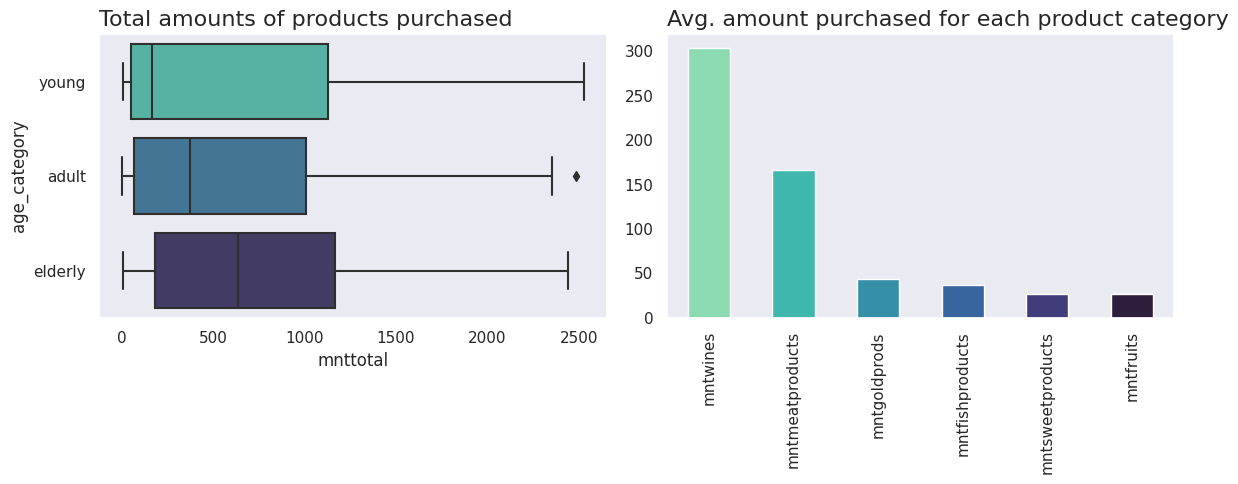

In [33]:
fig, ax = plt.subplots(1,2, figsize=(12,5))

sns.boxplot(x='mnttotal',
            y='age_category',
            data=purchase,
            palette='mako_r',
            linewidth=1.5,
           ax=ax[0])
ax[0].set_title('Total amounts of products purchased', loc='left', size=16)

df_copy.loc[:,'mntwines':'mntgoldprods'].mean().sort_values(ascending=False)\
    .plot(kind='bar',
          color=sns.color_palette('mako_r'),
         ax=ax[1])
ax[1].set_title('Avg. amount purchased for each product category', size=16, loc='left')

plt.tight_layout()
plt.show()

In [34]:
purchase = purchase.drop(purchase[purchase['income'] > 120000].index)

Text(0.0, 1.0, 'Income')

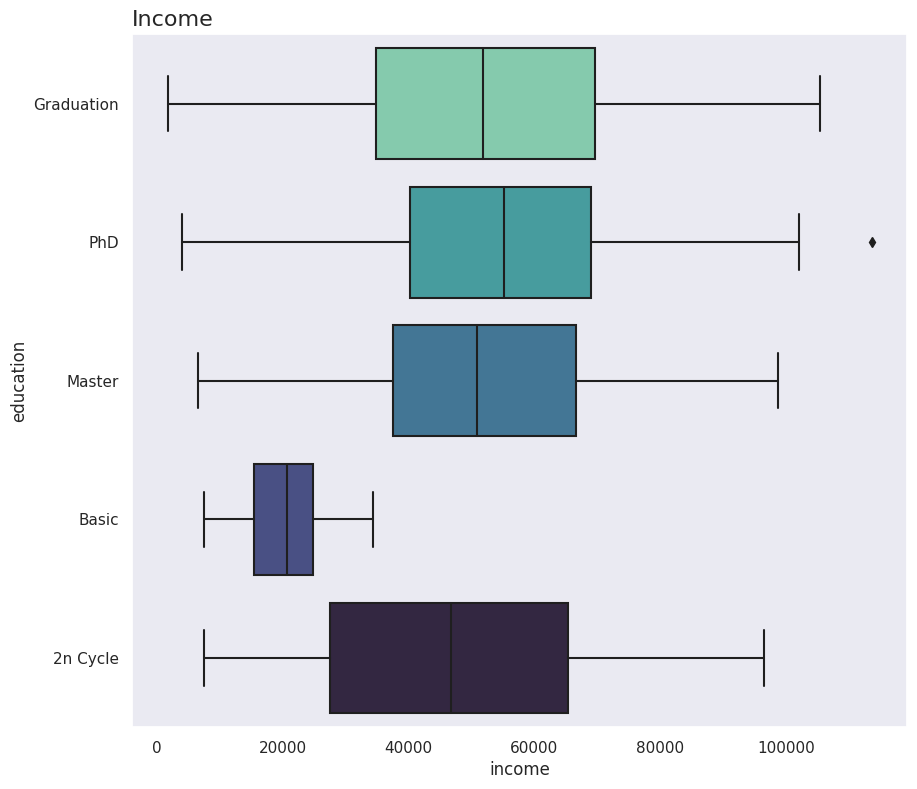

In [35]:
fig, ax = plt.subplots(figsize=(10,9))
sns.boxplot(x='income',
            y='education',
            data=purchase,
            palette='mako_r',
            linewidth=1.5,
            )
ax.set_title('Income', loc='left', size=16)


Text(0.0, 1.0, 'Total amounts of products purchased')

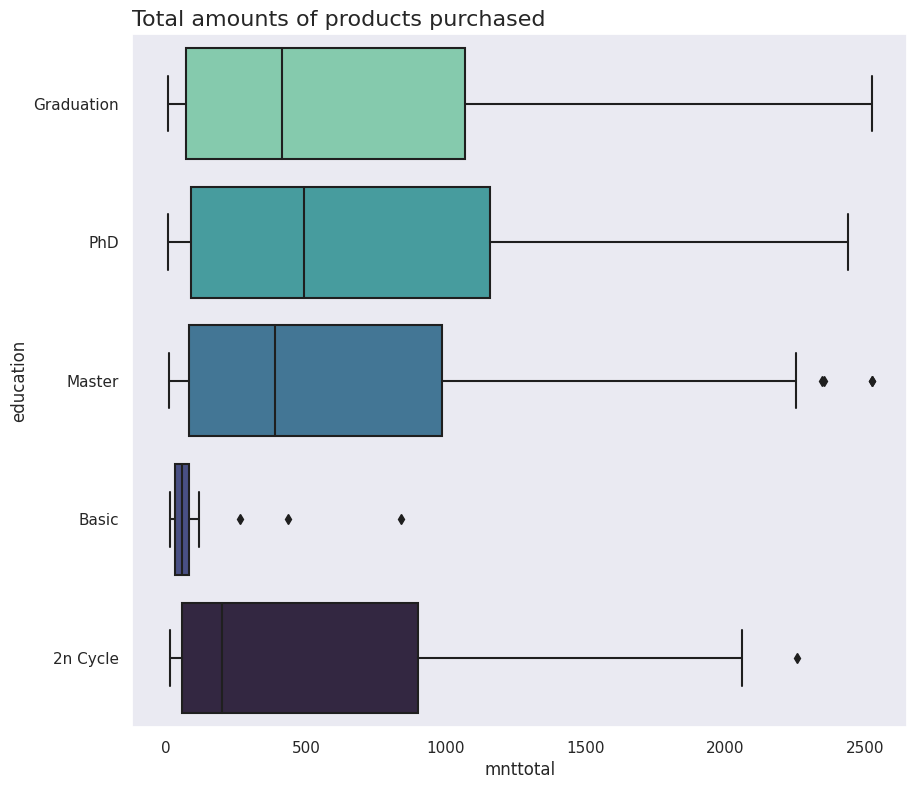

In [36]:
fig, ax = plt.subplots(figsize=(10,9))
sns.boxplot(x='mnttotal',
            y='education',
            data=purchase,
            palette='mako_r',
            linewidth=1.5,
            )
ax.set_title('Total amounts of products purchased', loc='left', size=16)

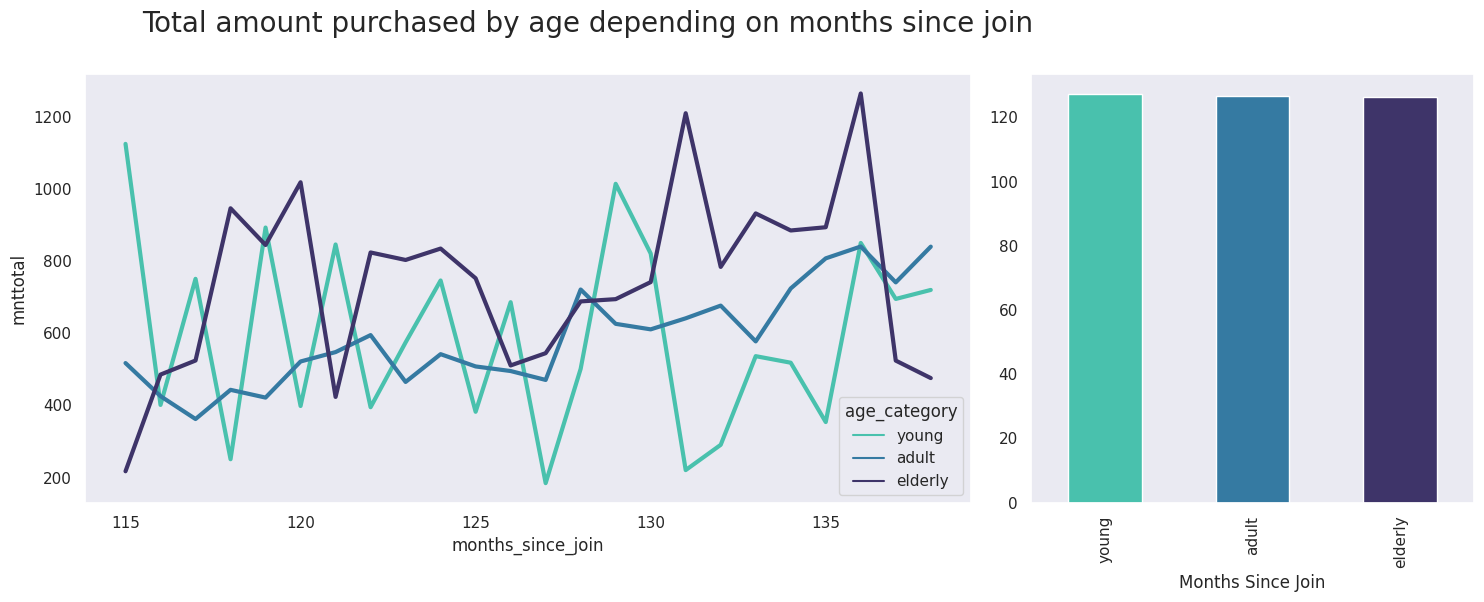

In [37]:
purchase['months_since_join'] = ((datetime.now() - purchase['dt_customer']) / pd.Timedelta(days=30)).astype(int)
group_by_months = purchase.groupby(['months_since_join','age_category'])['mnttotal'].mean().reset_index()

fig, ax = plt.subplots(1,2, figsize=(15,6), gridspec_kw={'width_ratios': [2, 1]})

sns.lineplot(x='months_since_join',
             y='mnttotal',
             data=group_by_months,
             hue='age_category',
             ax=ax[0],
             palette='mako_r',
            linewidth=3)

purchase.groupby('age_category')['months_since_join'].mean().plot(kind='bar',
                                                                  color=sns.color_palette('mako_r',3),
                                                                  xlabel='Months Since Join',
                                                                 ax=ax[1])

plt.suptitle('Total amount purchased by age depending on months since join',
             x=0.1, y=1.0, fontsize=20, ha="left")
plt.tight_layout()
plt.show()


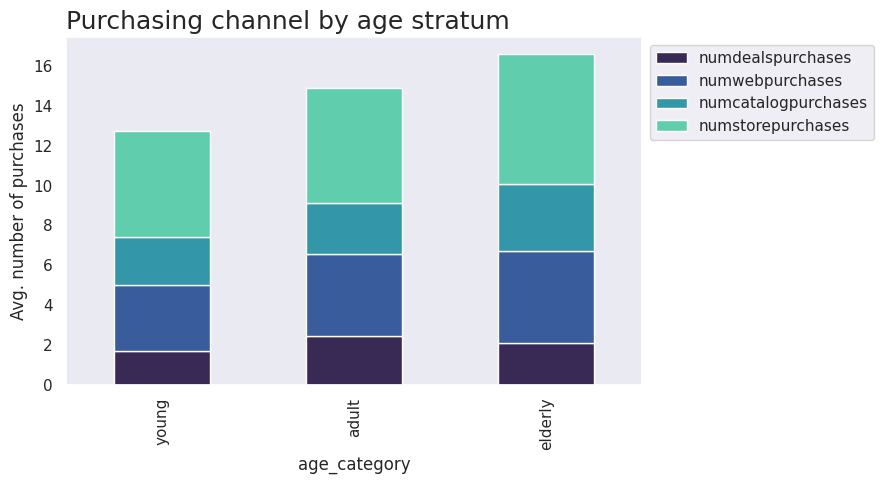

In [38]:
purchasing_channels = ['numdealspurchases','numwebpurchases','numcatalogpurchases','numstorepurchases']
fig, ax = plt.subplots(figsize=(9,5))
df_copy.groupby('age_category')[purchasing_channels].mean()\
                            .plot(kind='bar', ax=ax, stacked=True,
                            color=sns.set_palette('mako',4))

plt.title('Purchasing channel by age stratum', loc='left', size=18)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
ax.set_ylabel('Avg. number of purchases')
plt.tight_layout()
plt.show()

In [39]:
df_copy['mnttotal'] = df_copy.loc[:,'mntwines':'mntgoldprods'].sum(1)

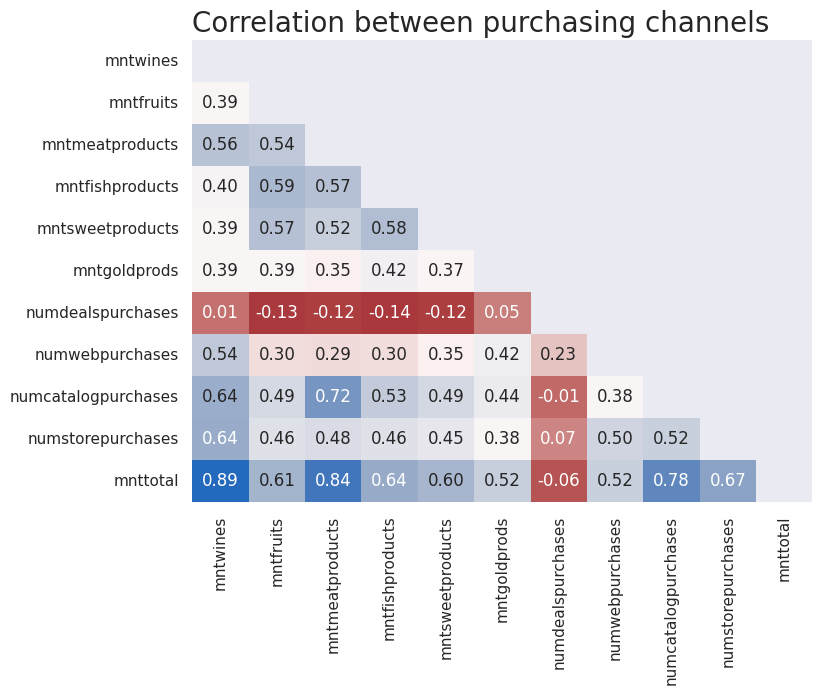

In [40]:
purchasing_channel = pd.concat([df_copy.loc[:,'mntwines':'numstorepurchases'], df_copy['mnttotal']], axis=1)

plt.figure(figsize=(8,6))
mask = np.triu(np.ones_like(purchasing_channel.corr(), dtype=bool))
sns.heatmap(purchasing_channel.corr(), annot=True, cmap='vlag_r', fmt='.2f', cbar=False, mask=mask)
plt.title('Correlation between purchasing channels', size=20, loc='left')
plt.show()

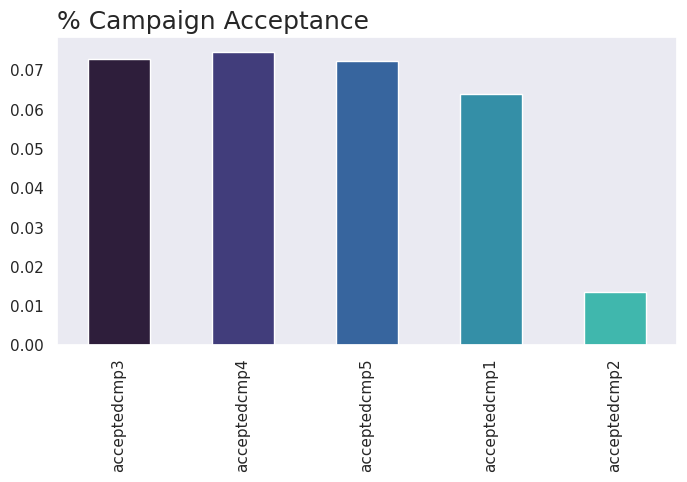

In [118]:
campaigns = df_copy.loc[:,'acceptedcmp3':'response'].drop('complain', axis=1)

# Rename response as acceptedcmp6 for more practicity
#campaigns.rename(columns={'response':'acceptedcmp6'}, inplace=True)
campaigns=campaigns.drop('response', axis=1)
# Plot the acceptance ratio for each campaign
fig, ax = plt.subplots(figsize=(8,4))
# campaigns.mean().sort_values(ascending=False).plot(kind='bar', color=sns.color_palette('mako'),
#                                                   ax=ax)
campaigns.mean().plot(kind='bar', color=sns.color_palette('mako'),
                                                  ax=ax)
ax.set_title('% Campaign Acceptance', size=18, loc='left')
plt.show()

In [119]:
campaigns.mean()

acceptedcmp3    0.072898
acceptedcmp4    0.074687
acceptedcmp5    0.072451
acceptedcmp1    0.063953
acceptedcmp2    0.013417
dtype: float64

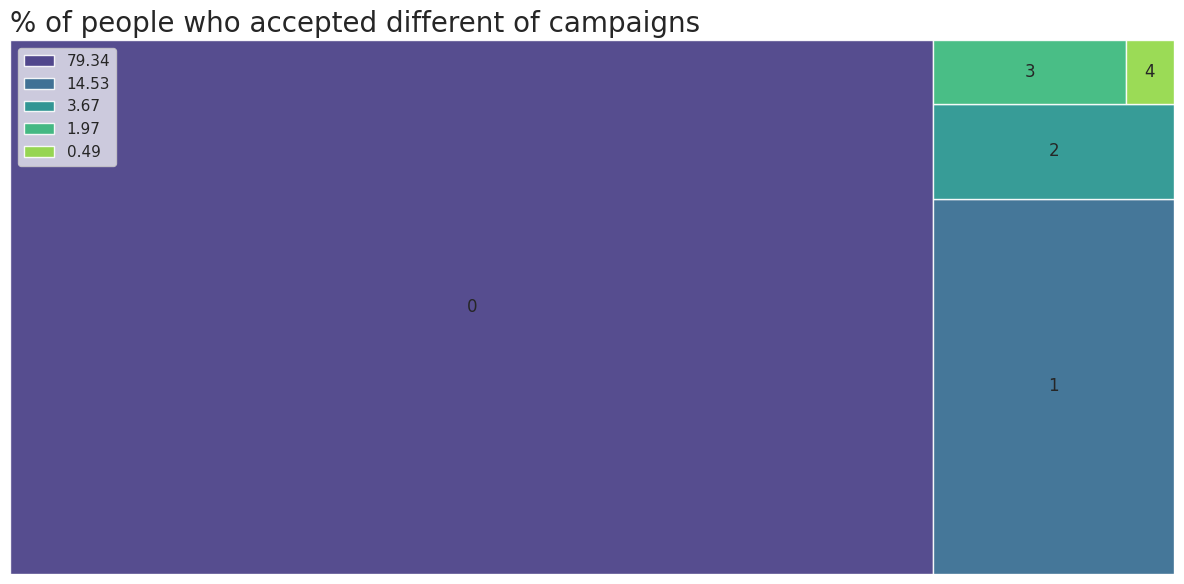

In [117]:
people_acceptance = campaigns.sum(1).value_counts(normalize=True).sort_values(ascending=False)

plt.figure(figsize=(12,6))
squarify.plot(sizes=people_acceptance, label=people_acceptance.index,
              color=sns.color_palette('viridis',len(people_acceptance)),
              alpha=.9)
plt.legend(np.round(people_acceptance*100,2))
plt.axis('off')
plt.title('% of people who accepted different of campaigns', loc='left', size=20)
plt.tight_layout()
plt.show()

In [121]:
people_acceptance = campaigns.sum(1).value_counts(normalize=True).sort_values(ascending=False)
people_acceptance

0    0.793381
1    0.145349
2    0.036673
3    0.019678
4    0.004919
dtype: float64

In [125]:
campaigns

,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2
0,0,0,0,0,0
1,0,0,0,0,0
2,0,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,0
...,...,...,...,...,...
2235,0,0,0,0,0
2236,0,0,0,1,0
2237,0,1,0,0,0
2238,0,0,0,0,0


In [124]:
people_acceptance = campaigns.sum(1).value_counts()
people_acceptance

0    1774
1     325
2      82
3      44
4      11
dtype: int64

In [126]:
import plotly
import plotly.graph_objects as go
# Create Figure
fig = go.Figure()

# Create Bar Chart
response_count = df_copy["response"].value_counts()
response_percentage = (response_count / response_count.sum()) * 100
fig.add_trace(go.Bar(x=[str(x) for x in response_count.index.tolist()],
                     y=response_count.values,
                    # marker_color=["#d7af00", "#f2401e"],
                     showlegend=False,
                     text=[f"{percentage:.2f}%" for percentage in response_percentage],
                     textfont_size=20,
                     textfont_color="white"
             )
)

# Update Axes
fig.update_xaxes(showgrid=False, linecolor='black', title_text='Response')
fig.update_yaxes(showgrid=False, linecolor='black')

# Update Layout
fig.update_layout(title_text="Percentage of Response",
                  width=600,
                  height=400,
                  plot_bgcolor='white',
                  showlegend=True,
                  legend={"itemsizing":"constant"}
)

# Show
fig.show()


In [44]:
fig = go.Figure()

# Create Bar Chart
response_count = df_copy["complain"].value_counts()
response_percentage = (response_count / response_count.sum()) * 100
fig.add_trace(go.Bar(x=[str(x) for x in response_count.index.tolist()],
                     y=response_count.values,
                    # marker_color=["#d7af00", "#f2401e"],
                     showlegend=False,
                     text=[f"{percentage:.2f}%" for percentage in response_percentage],
                     textfont_size=20,
                     textfont_color="white"
             )
)

# Update Axes
fig.update_xaxes(showgrid=False, linecolor='black', title_text='Complain')
fig.update_yaxes(showgrid=False, linecolor='black')

# Update Layout
fig.update_layout(title_text="Percentage of the Last Campaign",
                  width=600,
                  height=400,
                  plot_bgcolor='white',
                  showlegend=True,
                  legend={"itemsizing":"constant"}
)

# Show
fig.show()

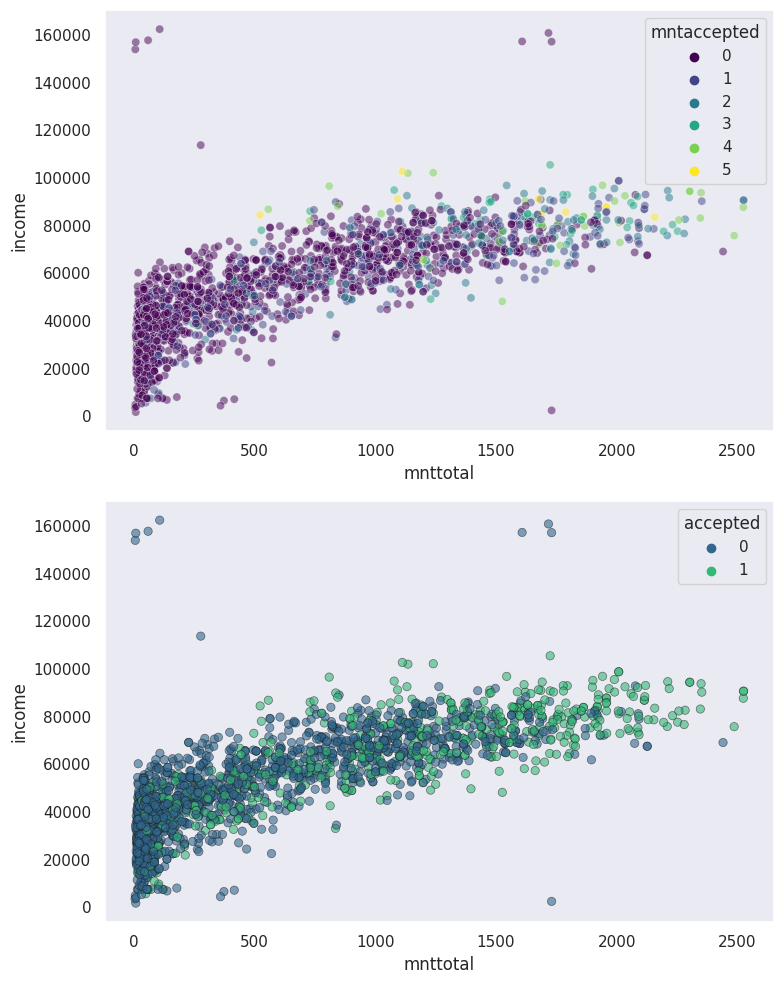

In [45]:
df_without_outliers = df_copy.loc[(df_copy.year_birth > 1940) & (df_copy.income < 200_000)]
df_without_outliers['mntaccepted'] = campaigns.sum(1)
df_without_outliers['accepted'] = df_without_outliers['mntaccepted'].apply(lambda x: 1 if x > 0 else x)

fig, ax = plt.subplots(2, figsize=(8,10))
sns.scatterplot(data=df_without_outliers,
                        x='mnttotal', y='income',
                        hue='mntaccepted',
                        palette='viridis',
                        alpha=.5,
                        ax=ax[0])


sns.scatterplot(data=df_without_outliers,
                        x='mnttotal', y='income',
                        hue='accepted',
                        palette='viridis',
                        alpha=.6,
                        edgecolor='k',
                        ax=ax[1])

plt.tight_layout()
plt.show()


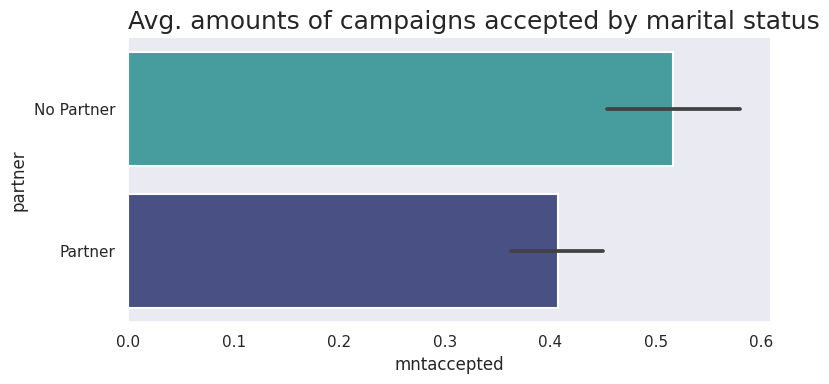

In [46]:
df_copy['mntaccepted'] = campaigns.sum(1)

fig, ax = plt.subplots(figsize=(8,4))
sns.barplot(x='mntaccepted', y='partner', data=df_copy, palette='mako_r', linewidth=1.5)
ax.set_title('Avg. amounts of campaigns accepted by marital status', size=18,
             loc='left')
plt.tight_layout()
plt.show()

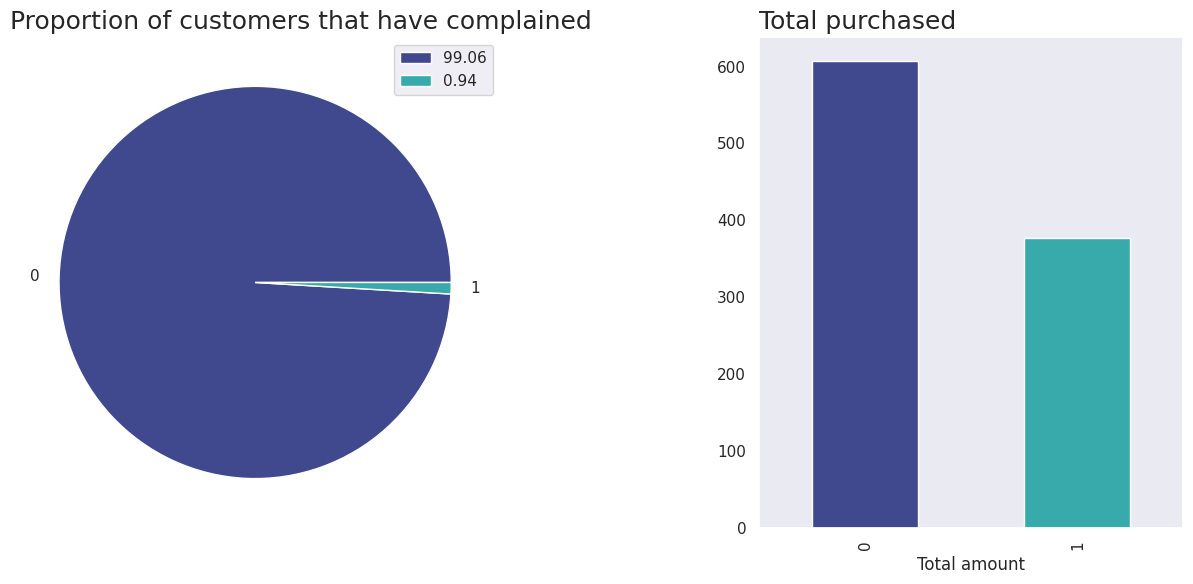

In [47]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 6), gridspec_kw={'width_ratios': [3, 1]})

df_copy.loc[:, 'complain'].value_counts().plot(kind='pie', ax=axes[0], colors=sns.color_palette('mako', 2))
axes[0].set_title('Proportion of customers that have complained', size=18, loc='left')
axes[0].legend(np.round(df_copy.loc[:, 'complain'].value_counts(normalize=True) * 100, 2))
axes[0].axis('off')

df_copy.groupby('complain')['mnttotal'].mean().plot(kind='bar', color=sns.color_palette('mako', 2), ax=axes[1])
axes[1].set_title('Total purchased', size=18, loc='left')
axes[1].set_xlabel('Total amount')

plt.tight_layout()
plt.show()

In [48]:
df.isnull().sum().sort_values(ascending=False)[:1]

Income    24
dtype: int64

In [49]:
column_with_most_nulls = df.isnull().sum().sort_values(ascending=False).index[0]

# Xóa các dòng có giá trị null trong cột đó
df = df.dropna(subset=[column_with_most_nulls])

In [50]:
df.columns = df.columns.str.lower()
rows_to_drop = df[df['marital_status'].isin(['YOLO', 'Absurd'])].index
df.drop(rows_to_drop, inplace=True)

In [51]:
def outliers_treatment(df):
    """Capping outliers"""
    df_num = df.select_dtypes(['number'])
    for i in df_num:
        low = df[i].quantile(.01)
        up = df[i].quantile(.99)
        df[i] = df[i].apply(lambda x: low if x < low else up if x > up else x)
    return df

In [52]:
# Create the new columns
def modify_columnss(df):
    """Creating previous columns"""
    df.columns = df.columns.str.lower()
    df['dt_customer'] = pd.to_datetime(df.dt_customer, format='%d-%m-%Y')
    # Create new columns
    not_graduated = ['Basic','2n cycle']
    couple = ['Married','Together']
    df['graduated'] = df['education'].apply(lambda x: 'Not Graduated' if x in not_graduated else 'Graduated')
    df['partner'] = df['marital_status'].apply(lambda x: 'Partner' if x in couple else 'No Partner')
    df['mnttotal'] = df.loc[:,'mntwines':'mntgoldprods'].sum(1)
    df['mntaccepted'] = pd.concat([df.loc[:,'acceptedcmp3':'acceptedcmp2'],df.loc[:,'response']], axis=1).sum(1)
    df['accepted'] = df['mntaccepted'].apply(lambda x: 1 if x > 0 else 0)
    df['age'] = max(pd.to_datetime(df['dt_customer']).dt.year) - df['year_birth']
    df['age_category'] = age_clusters
    return df

# Apply FunctionTransformer for the functions
mod_columns = FunctionTransformer(modify_columnss)
log_transformer = FunctionTransformer(lambda x: np.log(x))

# Missing values
knn = KNNImputer(n_neighbors=3)

# Outliers treatment
capping_out = FunctionTransformer(outliers_treatment)

# Data Scaling and Formatting
sc = StandardScaler()
ohe = OneHotEncoder(handle_unknown='ignore')

# Create the column transformer
knn_sc_log = make_pipeline(log_transformer, sc, knn)
sc_log = make_pipeline(log_transformer, sc)

ct = make_column_transformer(
                             (knn_sc_log,['income']),
                             (sc_log,['mnttotal']),
                             (ohe,['partner','graduated']),
                              remainder='drop'
                              )

# Create the pipeline
pipe = make_pipeline(
                     mod_columns,
                     capping_out,
                     ct
                     )
pipe

Pipeline(steps=[('functiontransformer-1',
                 FunctionTransformer(func=<function modify_columnss at 0x7dd232d4db40>)),
                ('functiontransformer-2',
                 FunctionTransformer(func=<function outliers_treatment at 0x7dd232d4d990>)),
                ('columntransformer',
                 ColumnTransformer(transformers=[('pipeline-1',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function <la...d80>)),
                                                                  ('standardscaler',
                                                                   StandardScaler()),
                                                                  ('knnimputer',
                                                                   KNNImputer(n_neighbors=3))]),
                                                  ['income']),
                                                 ('pipeline-2',
                                                  Pipeline(steps=[('functiontransformer',
                                                                   FunctionTransformer(func=<function <lambda> at 0x7dd234d39d80>)),
                                                                  ('standardscaler',
                                                                   StandardScaler())]),
                                                  ['mnttotal']),
                                                 ('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['partner', 'graduated'])]))])

In [53]:
df_copy_3 = df.copy()

df_prep = pipe.fit_transform(df_copy_3)

In [54]:
columns = ['income','mnttotal']
ohe_columns = pipe.named_steps['columntransformer'].named_transformers_['onehotencoder'].get_feature_names_out().tolist()
column_names = columns + ohe_columns

In [55]:
df_copy.education.value_counts(dropna=False, normalize=True)

Graduation    0.503578
PhD           0.216458
Master        0.165027
2n Cycle      0.090787
Basic         0.024150
Name: education, dtype: float64

In [63]:
def modify_columns(df):
    """Creating previous columns"""

    df.columns = df.columns.str.lower()
    couple = ['Married','Together']
    df['partner'] = df['marital_status'].apply(lambda x: 'Partner' if x in couple else 'No Partner')
    df['mnttotal'] = df.loc[:,'mntwines':'mntgoldprods'].sum(1)
    #df['mntaccepted'] = df.loc[:,'acceptedcmp1':'acceptedcmp5'].sum(1)
    df['mntaccepted'] = pd.concat([df.loc[:,'acceptedcmp3':'acceptedcmp2'],df.loc[:,'response']], axis=1).sum(1)
    df['accepted'] = df['mntaccepted'].apply(lambda x: 1 if x > 0 else 0)
    df['dt_customer'] = pd.to_datetime(df.dt_customer, format='%d-%m-%Y')
    df['age'] = max(pd.to_datetime(df['dt_customer']).dt.year) - df['year_birth']
    df['age_category'] = age_clusters
    df['younghome']=df.kidhome+df.teenhome

    return df
     #
      #not_graduated = ['Basic','2n cycle']
       #

In [96]:
def modify_columns1(df):
    df['partner'] = df['partner'].replace({'Partner': 1, 'No Partner': 0})
    df['age_category'] = df['age_category'].replace({'young': 1, 'adult': 2,'elderly': 3 })
    df['education'] = df['education'].replace({'Basic': 1, 'Graduation': 2,'2n Cycle': 3,'Master': 4,'PhD': 5  })
    df.drop(['id','z_costcontact','z_revenue'], axis=1, inplace=True)
    df.drop(['year_birth','marital_status','dt_customer','mntaccepted','complain','response','recency','age','numwebvisitsmonth'], axis=1, inplace=True)
    df.drop(['acceptedcmp1','acceptedcmp2','acceptedcmp3','acceptedcmp4','acceptedcmp5','acceptedcmp6'], axis=1, inplace=True)
    df.drop(['kidhome','teenhome'], axis=1, inplace=True)
    df.drop(['mntwines','mntfruits','mntmeatproducts','mntfishproducts','mntsweetproducts','mntgoldprods'], axis=1, inplace=True)
    return df

In [ ]:
# purchasing_channel = pd.concat([df_copy.loc[:,'teenhome':'kidhome'], df_copy['younghome']], axis=1)

# plt.figure(figsize=(8,6))
# mask = np.triu(np.ones_like(purchasing_channel.corr(), dtype=bool))
# sns.heatmap(purchasing_channel.corr(), annot=True, cmap='vlag_r', fmt='.2f', cbar=False, mask=mask)
# plt.title('Correlation between purchasing channels', size=20, loc='left')
# plt.show()

In [99]:
df_copy_1 = df.copy()
outliers_treatment(df_copy_1)
modify_columns(df_copy_1)

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,partner,mnttotal,mntaccepted,accepted,age,age_category,younghome
0,5524.0,1957.0,Graduation,Single,58138.0,0,0,2012-09-04,58.0,635.0,88.0,546.0,172.0,88.0,88.00,3.0,8.0,10.0,4.0,7.0,0,0,0,0,0,0.0,3,11,1,No Partner,1617.00,1,1,57.0,adult,0
1,2174.0,1954.0,Graduation,Single,46344.0,1,1,2014-03-08,38.0,11.0,1.0,6.0,2.0,1.0,6.00,2.0,1.0,1.0,2.0,5.0,0,0,0,0,0,0.0,3,11,0,No Partner,27.00,0,0,60.0,adult,2
2,4141.0,1965.0,Graduation,Together,71613.0,0,0,2013-08-21,26.0,426.0,49.0,127.0,111.0,21.0,42.00,1.0,8.0,2.0,10.0,4.0,0,0,0,0,0,0.0,3,11,0,Partner,776.00,0,0,49.0,adult,0
3,6182.0,1984.0,Graduation,Together,26646.0,1,0,2014-02-10,26.0,11.0,4.0,20.0,10.0,3.0,5.00,2.0,2.0,0.0,4.0,6.0,0,0,0,0,0,0.0,3,11,0,Partner,53.00,0,0,30.0,young,1
4,5324.0,1981.0,PhD,Married,58293.0,1,0,2014-01-19,94.0,173.0,43.0,118.0,46.0,27.0,15.00,5.0,5.0,3.0,6.0,5.0,0,0,0,0,0,0.0,3,11,0,Partner,422.00,0,0,33.0,adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1967.0,Graduation,Married,61223.0,0,1,2013-06-13,46.0,709.0,43.0,182.0,42.0,118.0,226.67,2.0,9.0,3.0,4.0,5.0,0,0,0,0,0,0.0,3,11,0,Partner,1320.67,0,0,47.0,adult,1
2236,4001.0,1946.0,PhD,Together,64014.0,2,1,2014-06-10,56.0,406.0,0.0,30.0,0.0,0.0,8.00,7.0,8.0,2.0,5.0,7.0,0,0,0,1,0,0.0,3,11,0,Partner,444.00,1,1,68.0,elderly,3
2237,7270.0,1981.0,Graduation,Divorced,56981.0,0,0,2014-01-25,91.0,908.0,48.0,217.0,32.0,12.0,24.00,1.0,2.0,3.0,13.0,6.0,0,1,0,0,0,0.0,3,11,0,No Partner,1241.00,1,1,33.0,adult,0
2238,8235.0,1956.0,Master,Together,69245.0,0,1,2014-01-24,8.0,428.0,30.0,214.0,80.0,30.0,61.00,2.0,6.0,5.0,10.0,3.0,0,0,0,0,0,0.0,3,11,0,Partner,843.00,0,0,58.0,adult,1


In [100]:
df_copy_1

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,partner,mnttotal,mntaccepted,accepted,age,age_category,younghome
0,5524.0,1957.0,Graduation,Single,58138.0,0,0,2012-09-04,58.0,635.0,88.0,546.0,172.0,88.0,88.00,3.0,8.0,10.0,4.0,7.0,0,0,0,0,0,0.0,3,11,1,No Partner,1617.00,1,1,57.0,adult,0
1,2174.0,1954.0,Graduation,Single,46344.0,1,1,2014-03-08,38.0,11.0,1.0,6.0,2.0,1.0,6.00,2.0,1.0,1.0,2.0,5.0,0,0,0,0,0,0.0,3,11,0,No Partner,27.00,0,0,60.0,adult,2
2,4141.0,1965.0,Graduation,Together,71613.0,0,0,2013-08-21,26.0,426.0,49.0,127.0,111.0,21.0,42.00,1.0,8.0,2.0,10.0,4.0,0,0,0,0,0,0.0,3,11,0,Partner,776.00,0,0,49.0,adult,0
3,6182.0,1984.0,Graduation,Together,26646.0,1,0,2014-02-10,26.0,11.0,4.0,20.0,10.0,3.0,5.00,2.0,2.0,0.0,4.0,6.0,0,0,0,0,0,0.0,3,11,0,Partner,53.00,0,0,30.0,young,1
4,5324.0,1981.0,PhD,Married,58293.0,1,0,2014-01-19,94.0,173.0,43.0,118.0,46.0,27.0,15.00,5.0,5.0,3.0,6.0,5.0,0,0,0,0,0,0.0,3,11,0,Partner,422.00,0,0,33.0,adult,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,10870.0,1967.0,Graduation,Married,61223.0,0,1,2013-06-13,46.0,709.0,43.0,182.0,42.0,118.0,226.67,2.0,9.0,3.0,4.0,5.0,0,0,0,0,0,0.0,3,11,0,Partner,1320.67,0,0,47.0,adult,1
2236,4001.0,1946.0,PhD,Together,64014.0,2,1,2014-06-10,56.0,406.0,0.0,30.0,0.0,0.0,8.00,7.0,8.0,2.0,5.0,7.0,0,0,0,1,0,0.0,3,11,0,Partner,444.00,1,1,68.0,elderly,3
2237,7270.0,1981.0,Graduation,Divorced,56981.0,0,0,2014-01-25,91.0,908.0,48.0,217.0,32.0,12.0,24.00,1.0,2.0,3.0,13.0,6.0,0,1,0,0,0,0.0,3,11,0,No Partner,1241.00,1,1,33.0,adult,0
2238,8235.0,1956.0,Master,Together,69245.0,0,1,2014-01-24,8.0,428.0,30.0,214.0,80.0,30.0,61.00,2.0,6.0,5.0,10.0,3.0,0,0,0,0,0,0.0,3,11,0,Partner,843.00,0,0,58.0,adult,1


In [101]:
df_copy_2 = df_copy_1.copy()
modify_columns1(df_copy_2)

,education,income,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,partner,mnttotal,accepted,age_category,younghome
0,2,58138.0,3.0,8.0,10.0,4.0,0,1617.00,1,2,0
1,2,46344.0,2.0,1.0,1.0,2.0,0,27.00,0,2,2
2,2,71613.0,1.0,8.0,2.0,10.0,1,776.00,0,2,0
3,2,26646.0,2.0,2.0,0.0,4.0,1,53.00,0,1,1
4,5,58293.0,5.0,5.0,3.0,6.0,1,422.00,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,2.0,9.0,3.0,4.0,1,1320.67,0,2,1
2236,5,64014.0,7.0,8.0,2.0,5.0,1,444.00,1,3,3
2237,2,56981.0,1.0,2.0,3.0,13.0,0,1241.00,1,2,0
2238,4,69245.0,2.0,6.0,5.0,10.0,1,843.00,0,2,1


In [67]:
# Show correlation more than 50
corr= df_copy_1.corr()
c1 = corr.abs().unstack()
c1.sort_values(ascending = False)

id                   id                     1.0
numcatalogpurchases  numcatalogpurchases    1.0
income               income                 1.0
kidhome              kidhome                1.0
teenhome             teenhome               1.0
                                           ... 
age                  z_costcontact          NaN
                     z_revenue              NaN
younghome            complain               NaN
                     z_costcontact          NaN
                     z_revenue              NaN
Length: 961, dtype: float64

In [74]:
corr = df_copy_1.corr()
high_corr = corr[corr < 0.1]
high_corr = high_corr[high_corr < 1].stack().reset_index()
high_corr.columns = ['Variable 1', 'Variable 2', 'Correlation']
print(high_corr)


    Variable 1   Variable 2  Correlation
0           id   year_birth     0.003489
1           id       income     0.001873
2           id      kidhome     0.001841
3           id     teenhome    -0.002922
4           id      recency    -0.044441
..         ...          ...          ...
421  younghome     response    -0.167153
422  younghome     mnttotal    -0.500285
423  younghome  mntaccepted    -0.253643
424  younghome     accepted    -0.212324
425  younghome          age     0.091131

[426 rows x 3 columns]


In [ ]:
corr = df_copy_1.corr()
corr

In [88]:
feature_of_interest = 'mnttotal'
corr_matrix = df.corr()
correlations_with_feature = corr_matrix[feature_of_interest]
correlations_with_feature = correlations_with_feature[correlations_with_feature > 0.5]
print(f'Feature of Interest: {feature_of_interest}\n')
print('Correlation with Other Features:')
print(correlations_with_feature)


Feature of Interest: mnttotal

Correlation with Other Features:
income                 0.818571
mntwines               0.898939
mntfruits              0.621400
mntmeatproducts        0.858623
mntfishproducts        0.649828
mntsweetproducts       0.617456
mntgoldprods           0.537508
numwebpurchases        0.558831
numcatalogpurchases    0.804156
numstorepurchases      0.685918
mnttotal               1.000000
Name: mnttotal, dtype: float64


In [86]:
features_of_interest = ['z_revenue', 'complain', 'z_costcontact']
corr_matrix = df_copy_1.corr()
print(f'Features of Interest: {", ".join(features_of_interest)}\n')
for feature in features_of_interest:
    correlations_with_feature = corr_matrix[feature]
    print(f'Correlation with {feature}:')
    print(correlations_with_feature)
    print()


Features of Interest: z_revenue, complain, z_costcontact

Correlation with z_revenue:
id                    NaN
year_birth            NaN
income                NaN
kidhome               NaN
teenhome              NaN
recency               NaN
mntwines              NaN
mntfruits             NaN
mntmeatproducts       NaN
mntfishproducts       NaN
mntsweetproducts      NaN
mntgoldprods          NaN
numdealspurchases     NaN
numwebpurchases       NaN
numcatalogpurchases   NaN
numstorepurchases     NaN
numwebvisitsmonth     NaN
acceptedcmp3          NaN
acceptedcmp4          NaN
acceptedcmp5          NaN
acceptedcmp1          NaN
acceptedcmp2          NaN
complain              NaN
z_costcontact         NaN
z_revenue             NaN
response              NaN
mnttotal              NaN
mntaccepted           NaN
accepted              NaN
age                   NaN
younghome             NaN
Name: z_revenue, dtype: float64

Correlation with complain:
id                    NaN
year_birth            

In [ ]:
df_copy_2

,education,income,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,partner,mnttotal,accepted,age_category,younghome
0,2,58138.0,635.0,88.0,546.0,172.0,88.0,88.00,3.0,8.0,10.0,4.0,0,1617.00,1,2,0
1,2,46344.0,11.0,1.0,6.0,2.0,1.0,6.00,2.0,1.0,1.0,2.0,0,27.00,0,2,2
2,2,71613.0,426.0,49.0,127.0,111.0,21.0,42.00,1.0,8.0,2.0,10.0,1,776.00,0,2,0
3,2,26646.0,11.0,4.0,20.0,10.0,3.0,5.00,2.0,2.0,0.0,4.0,1,53.00,0,1,1
4,5,58293.0,173.0,43.0,118.0,46.0,27.0,15.00,5.0,5.0,3.0,6.0,1,422.00,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2235,2,61223.0,709.0,43.0,182.0,42.0,118.0,226.67,2.0,9.0,3.0,4.0,1,1320.67,0,2,1
2236,5,64014.0,406.0,0.0,30.0,0.0,0.0,8.00,7.0,8.0,2.0,5.0,1,444.00,1,3,3
2237,2,56981.0,908.0,48.0,217.0,32.0,12.0,24.00,1.0,2.0,3.0,13.0,0,1241.00,1,2,0
2238,4,69245.0,428.0,30.0,214.0,80.0,30.0,61.00,2.0,6.0,5.0,10.0,1,843.00,0,2,1


In [102]:
std_scaler = StandardScaler()
std_data = std_scaler.fit_transform(df_copy_2)
scaled_df = pd.DataFrame(std_data,columns= df_copy_2.columns)


In [103]:
scaled_df

,education,income,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,partner,mnttotal,accepted,age_category,younghome
0,-0.818201,0.307895,0.393918,1.489477,2.667551,-0.562003,-1.352274,1.694808,1.633501,-0.010228,-1.265658
1,-0.818201,-0.260963,-0.165164,-1.159623,-0.593957,-1.181102,-1.352274,-0.963818,-0.612182,-0.010228,1.404476
2,-0.818201,0.957832,-0.724246,1.489477,-0.231567,1.295294,0.739495,0.288579,-0.612182,-0.010228,-1.265658
3,-0.818201,-1.211053,-0.165164,-0.781180,-0.956347,-0.562003,0.739495,-0.920344,-0.612182,-2.066897,0.069409
4,1.531251,0.315371,1.512082,0.354149,0.130822,0.057096,0.739495,-0.303342,-0.612182,-0.010228,0.069409
...,...,...,...,...,...,...,...,...,...,...,...
2207,-0.818201,0.456693,-0.165164,1.867920,0.130822,-0.562003,0.739495,1.199317,-0.612182,-0.010228,0.069409
2208,1.531251,0.591311,2.630247,1.489477,-0.231567,-0.252454,0.739495,-0.266556,1.633501,2.046442,2.739542
2209,-0.818201,0.252089,-0.724246,-0.781180,0.130822,2.223942,-1.352274,1.066101,1.633501,-0.010228,-1.265658
2210,0.748100,0.843616,-0.165164,0.732591,0.855602,1.295294,0.739495,0.400609,-0.612182,-0.010228,0.069409


In [ ]:
pca = PCA(3,svd_solver='full')
pca.fit(scaled_df)
lowdim_df = pca.transform(scaled_df)

In [ ]:
columns = ['pca_comp_%i' % i for i in range(3)]
df_pca  = pd.DataFrame(lowdim_df, columns=columns, index=df_copy_2.index)
df_pca.head()

,pca_comp_0,pca_comp_1,pca_comp_2
0,4.809304,-0.815663,0.664051
1,-2.784369,-0.442406,0.255224
2,1.777636,-0.501106,0.717912
3,-2.644668,-1.315609,0.820454
4,-0.189904,1.258871,0.040892


In [ ]:
import plotly.express as px
fig = px.scatter_3d(df_pca, x='pca_comp_0', y='pca_comp_1', z='pca_comp_2',size_max=20 ,color_discrete_sequence=['lightcoral'],
title="PCA Output Visualization")
fig.update_traces(marker=dict(size=8,line=dict(width=2,color='#d62828')),selector=dict(mode='markers'))
fig.update_layout(autosize=False,
    width=700,
    height=680,)
fig.show()

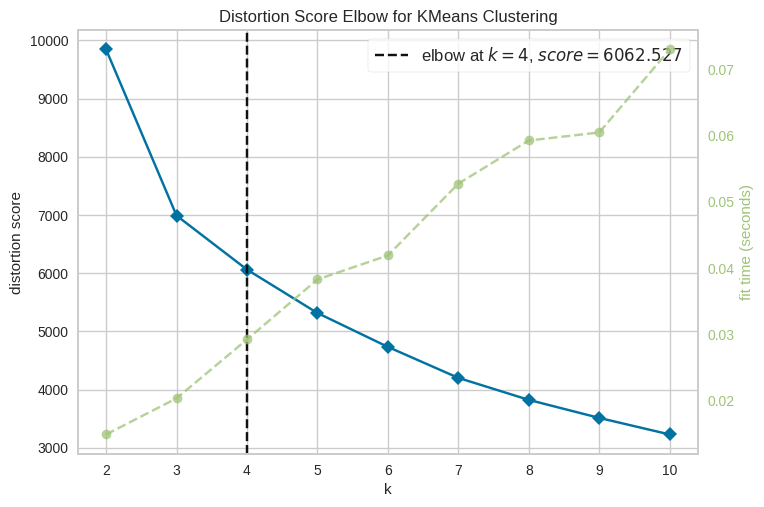

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [ ]:
from yellowbrick.cluster import KElbowVisualizer
Elbow_M = KElbowVisualizer(KMeans(), k=10)
Elbow_M.fit(df_pca)
Elbow_M.show()

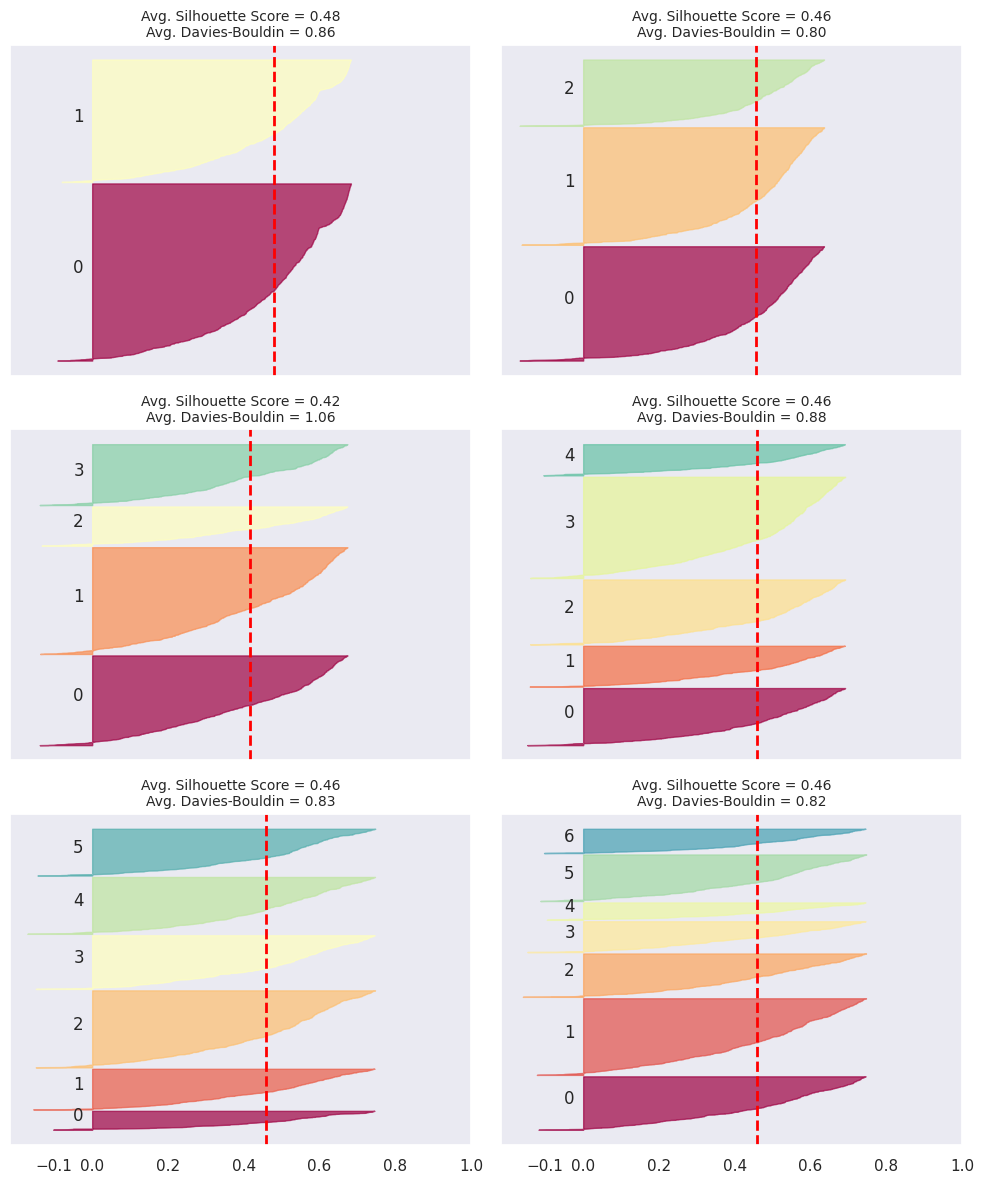

In [104]:
inertias = []
silhouette_scores = []
davies = []
k_values = range(2,8)

fig, axes = plt.subplots(3, 2, figsize=(10, 12), sharex=True)

for i, ax in enumerate(axes.flatten()):
    k = k_values[i]
    # Fit the model with k clusters
    kmeans = KMeans(n_clusters=k, n_init=50, random_state=0, algorithm='lloyd')
    kmeans.fit(df_prep)
    # Compute inertia and silhouette scores
    silhouette_values = silhouette_samples(df_prep, kmeans.labels_)
    silhouette_values.sort()
    silhouette_avg = silhouette_score(df_prep, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)
    inertias.append(kmeans.inertia_)
    davies.append(davies_bouldin_score(df_prep, kmeans.labels_))

    # Add a silhouette plot for each cluster
    y_lower = 10
    ax.set_title(f"Avg. Silhouette Score = {silhouette_avg:.2f}\nAvg. Davies-Bouldin = {davies_bouldin_score(df_prep, kmeans.labels_):.2f}",
                 size=10)
    for j in range(k):
        ith_cluster = silhouette_values[kmeans.labels_ == j]
        size_cluster_j = ith_cluster.shape[0]
        y_upper = y_lower + size_cluster_j

        color = plt.cm.get_cmap("Spectral")(float(j) / k)
        ax.fill_betweenx(np.arange(y_lower, y_upper),
                         0, ith_cluster,
                         facecolor=color, edgecolor=color, alpha=0.7)

        ax.text(-0.05, y_lower + 0.5 * size_cluster_j, str(j))

        # Compute the new y_lower for the next plot
        y_lower = y_upper + 10

    ax.axvline(x=silhouette_avg, color="red", linestyle="--", linewidth=2)

    ax.set_yticks([])
    ax.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

plt.tight_layout()
plt.show()

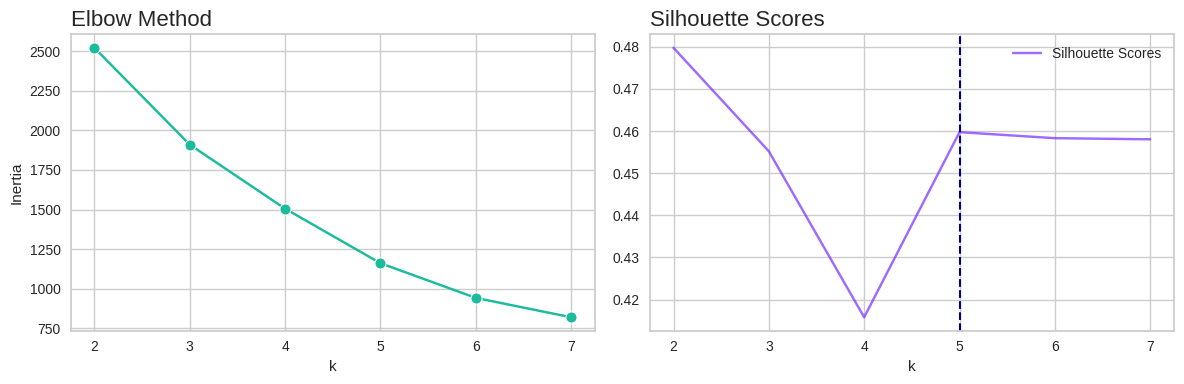

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(12, 4))

# Plot the Elbow Method
sns.lineplot(x=range(2, 8), y=inertias, color='#1ABC9C', ax=ax[0],marker='o', markersize=8,)
ax[0].set_title('Elbow Method', size=16, loc='left')
ax[0].set_xlabel('k')
ax[0].set_ylabel('Inertia')

# Plot Silhouette and Davies-Bouldin Scores
sns.lineplot(x=range(2, 8), y=silhouette_scores, color='#762CFF', label='Silhouette Scores', alpha=0.7, ax=ax[1])
# sns.lineplot(x=range(2, 8), y=davies, color='#34B6FF', label='Davies-Bouldin Scores', alpha=0.7, ax=ax[1])
ax[1].set_title('Silhouette Scores', size=16, loc='left')
ax[1].set_xlabel('k')
ax[1].legend()
ax[1].axvline(5, linewidth=1.5, color='darkblue', linestyle='--')

plt.tight_layout()
plt.show()

In [109]:
kmeans = KMeans(n_clusters=5, n_init=50, random_state=0)
kmeans_labels = kmeans.fit_predict(df_prep)
print(f"Silhouette Score: {silhouette_score(df_prep,kmeans_labels)}")

Silhouette Score: 0.45973359151995946


In [ ]:
# dbscan = DBSCAN(eps=0.3, min_samples=50, n_jobs=-1)
# dbscan_labels = dbscan.fit_predict(df_prep)

# print(f"Silhouette Score: {silhouette_score(df_prep, dbscan_labels)}")
# print('Davies-Bouldin Score: ',davies_bouldin_score(df_prep, dbscan_labels))

Silhouette Score: 0.2889022005155715
Davies-Bouldin Score:  1.0830005333304975


In [ ]:
df_pca["Cluster"] = kmeans_labels

In [ ]:
df_clustered = pd.concat([df_copy_1.reset_index().drop('index', axis=1),
                          pd.Series(kmeans_labels, name='kmeans', dtype='object')],
                          axis=1)

In [ ]:
fig = px.scatter_3d(df_pca, x='pca_comp_0', y='pca_comp_1', z='pca_comp_2',
title="Clusters Visualization",color="Cluster")
fig.update_traces(marker=dict(size=4),selector=dict(mode='markers'))
fig.update_layout(autosize=False,
    width=700,
    height=680,)
fig.show()

In [106]:
df_clustered = pd.concat([df_copy_1.reset_index().drop('index', axis=1),
                          pd.Series(kmeans_labels, name='kmeans', dtype='object')],
                          axis=1)

# Create the previous columns
#modify_columns(df_clustered)

df_clustered


,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,partner,mnttotal,mntaccepted,accepted,age,age_category,younghome,kmeans
0,5524.0,1957.0,Graduation,Single,58138.0,0,0,2012-09-04,58.0,635.0,88.0,546.0,172.0,88.0,88.00,3.0,8.0,10.0,4.0,7.0,0,0,0,0,0,0.0,3,11,1,No Partner,1617.00,1,1,57.0,adult,0,0
1,2174.0,1954.0,Graduation,Single,46344.0,1,1,2014-03-08,38.0,11.0,1.0,6.0,2.0,1.0,6.00,2.0,1.0,1.0,2.0,5.0,0,0,0,0,0,0.0,3,11,0,No Partner,27.00,0,0,60.0,adult,2,1
2,4141.0,1965.0,Graduation,Together,71613.0,0,0,2013-08-21,26.0,426.0,49.0,127.0,111.0,21.0,42.00,1.0,8.0,2.0,10.0,4.0,0,0,0,0,0,0.0,3,11,0,Partner,776.00,0,0,49.0,adult,0,3
3,6182.0,1984.0,Graduation,Together,26646.0,1,0,2014-02-10,26.0,11.0,4.0,20.0,10.0,3.0,5.00,2.0,2.0,0.0,4.0,6.0,0,0,0,0,0,0.0,3,11,0,Partner,53.00,0,0,30.0,young,1,2
4,5324.0,1981.0,PhD,Married,58293.0,1,0,2014-01-19,94.0,173.0,43.0,118.0,46.0,27.0,15.00,5.0,5.0,3.0,6.0,5.0,0,0,0,0,0,0.0,3,11,0,Partner,422.00,0,0,33.0,adult,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,10870.0,1967.0,Graduation,Married,61223.0,0,1,2013-06-13,46.0,709.0,43.0,182.0,42.0,118.0,226.67,2.0,9.0,3.0,4.0,5.0,0,0,0,0,0,0.0,3,11,0,Partner,1320.67,0,0,47.0,adult,1,3
2208,4001.0,1946.0,PhD,Together,64014.0,2,1,2014-06-10,56.0,406.0,0.0,30.0,0.0,0.0,8.00,7.0,8.0,2.0,5.0,7.0,0,0,0,1,0,0.0,3,11,0,Partner,444.00,1,1,68.0,elderly,3,3
2209,7270.0,1981.0,Graduation,Divorced,56981.0,0,0,2014-01-25,91.0,908.0,48.0,217.0,32.0,12.0,24.00,1.0,2.0,3.0,13.0,6.0,0,1,0,0,0,0.0,3,11,0,No Partner,1241.00,1,1,33.0,adult,0,0
2210,8235.0,1956.0,Master,Together,69245.0,0,1,2014-01-24,8.0,428.0,30.0,214.0,80.0,30.0,61.00,2.0,6.0,5.0,10.0,3.0,0,0,0,0,0,0.0,3,11,0,Partner,843.00,0,0,58.0,adult,1,3


In [111]:
custom_colors = {
    0: '#471164FF',
    1: '#3B528BFF',
    2: '#35B779FF',
    3: '#AADC32FF',
    4: '#FDE725FF'
}

colors = [custom_colors[cluster] for cluster in sorted(df_clustered['kmeans'].unique())]
custom_palette_kmeans = sns.set_palette(colors)

Total members of each cluster : green
3    758
2    486
0    428
1    306
4    234
Name: kmeans, dtype: int64
************************************************** green


Text(0.5, 1.0, 'Total members of each cluster')

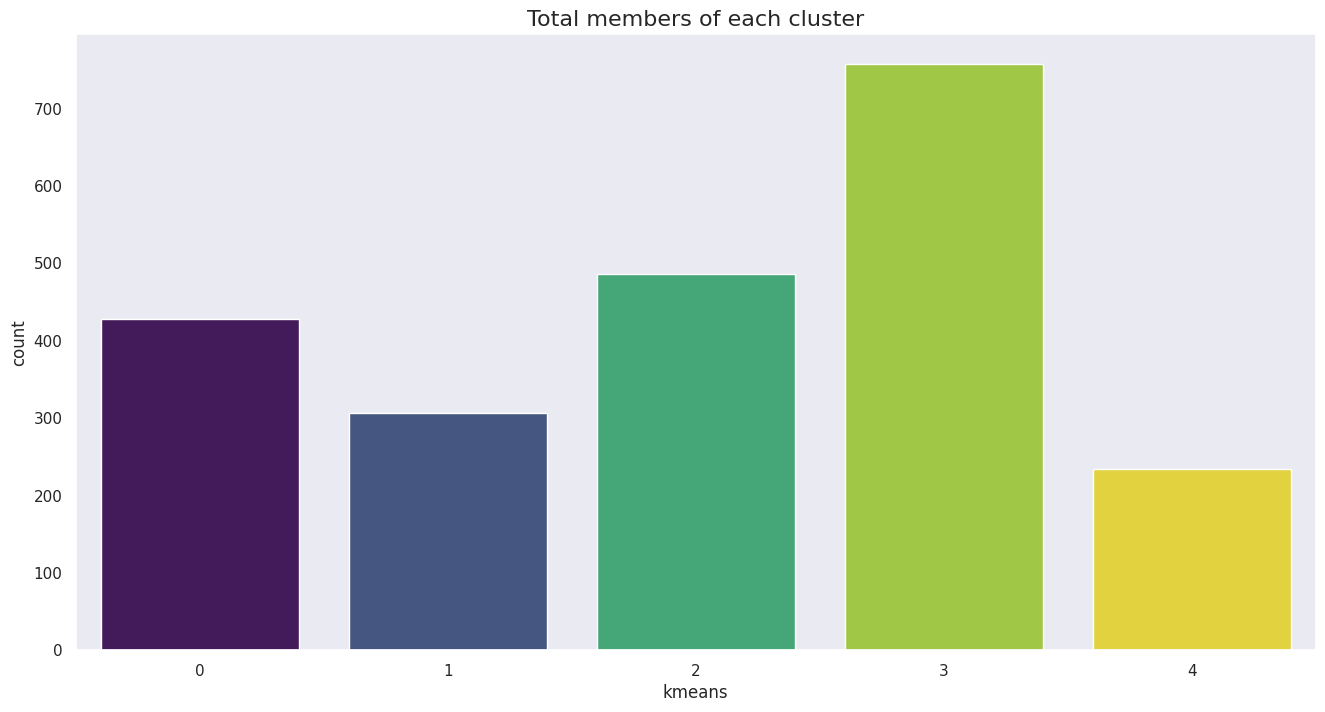

In [110]:
print('Total members of each cluster :','green')
print(df_clustered['kmeans'].value_counts())
print('*'*50,'green')
plt.rcParams['figure.figsize'] = (16, 8)
countcluster=sns.countplot(x='kmeans', data=df_clustered)
countcluster.set_title('Total members of each cluster',fontsize=16)

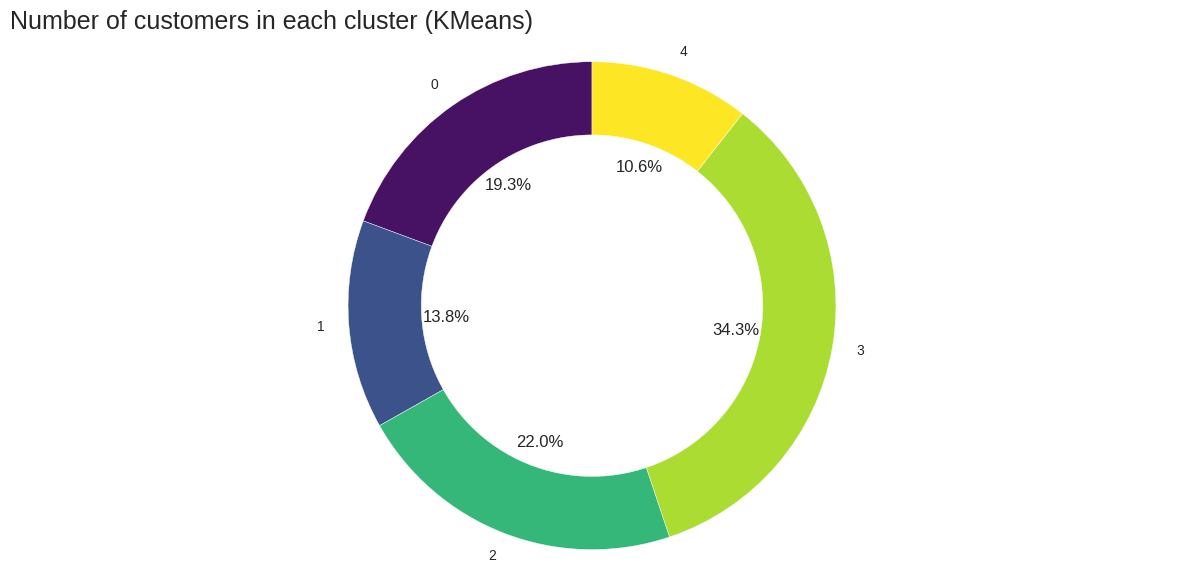

In [ ]:
fig, ax = plt.subplots(figsize=(12, 6))

ax.set_title('Number of customers in each cluster (KMeans)', loc='left', size=18)
kmeans_counts = df_clustered['kmeans'].value_counts().sort_index()
pie = ax.pie(kmeans_counts, labels=kmeans_counts.index, autopct='%1.1f%%', startangle=90,
             wedgeprops=dict(width=0.4, edgecolor='w'), colors=colors)

centre_circle = plt.Circle((0,0),0.70,fc='white')
fig.gca().add_artist(centre_circle)

plt.axis('equal')
plt.tight_layout()
plt.show()


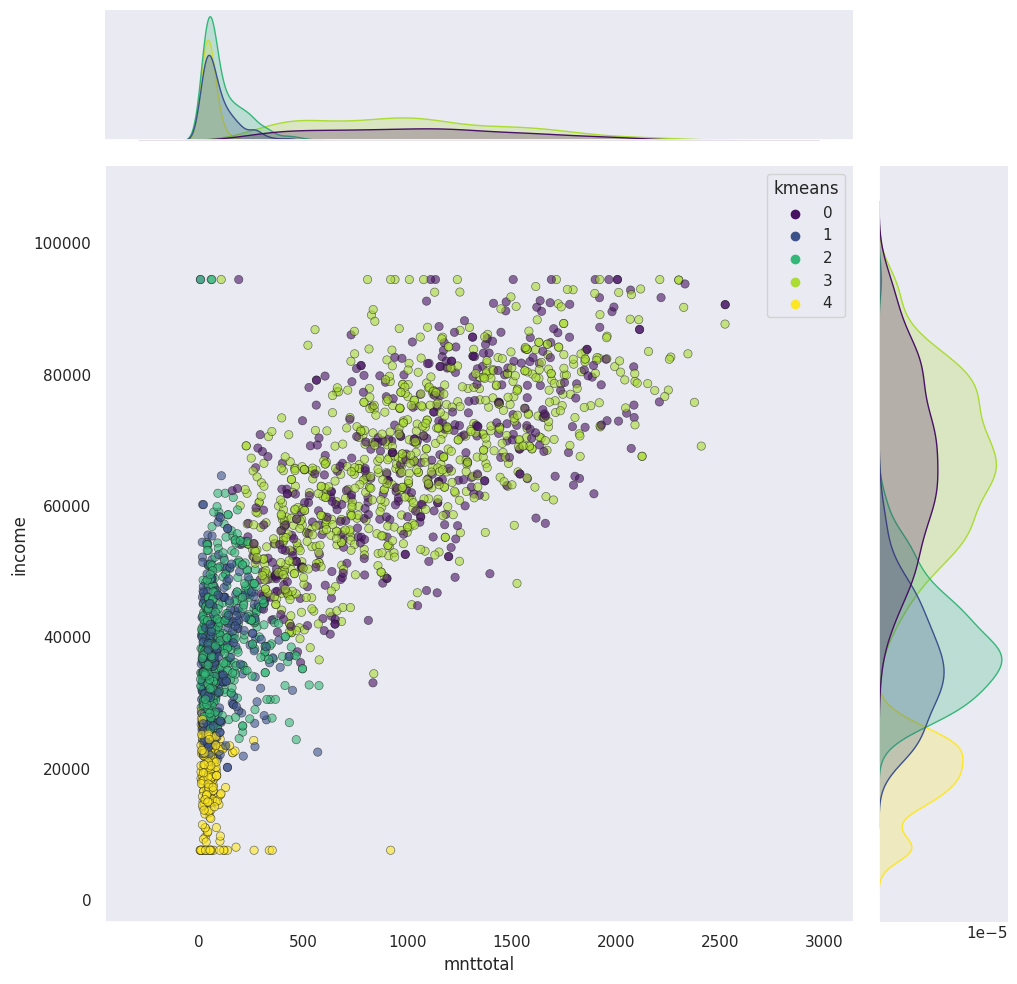

In [112]:
# KMeans
sns.jointplot(data=df_clustered,
                        x='mnttotal', y='income',
                        hue='kmeans',
                        palette=sns.color_palette(custom_palette_kmeans),
                        alpha=.6,
                        height=10,
                        edgecolor='k')
plt.show()

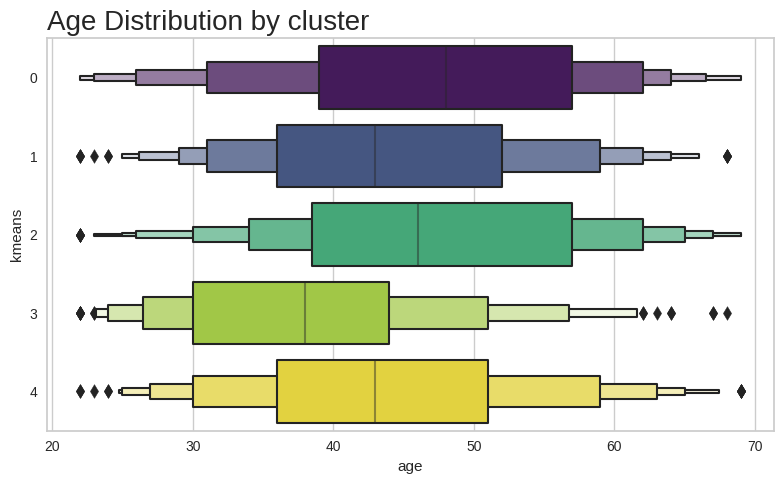

In [ ]:
fig, ax = plt.subplots(figsize=(8,5))

# KMeans
sns.boxenplot(x='age', y='kmeans', data=df_clustered, linewidth=1.5, orient='h')
ax.set_title('Age Distribution by cluster', loc='left', size=20)

plt.tight_layout()
plt.show()

In [ ]:
print('Avg Age of each cluster : ','green')
print(print(df_clustered.groupby(['kmeans'])['age'].agg('mean')))
print('*'*50)
print('Maximum Age of each cluster : ','green')
print(print(df_clustered.groupby(['kmeans'])['age'].agg('max')))
print('*'*50)
print('Minimum Age of each cluster : ','green')
print(print(df_clustered.groupby(['kmeans'])['age'].agg('min')))
print('*'*50)
agebox=sns.boxplot(x=df_clustered["kmeans"], y=df_clustered["age"])
agebox.set_title("Age In Each Cluster", size=15)

Avg Age of each cluster :  green


NameError: ignored

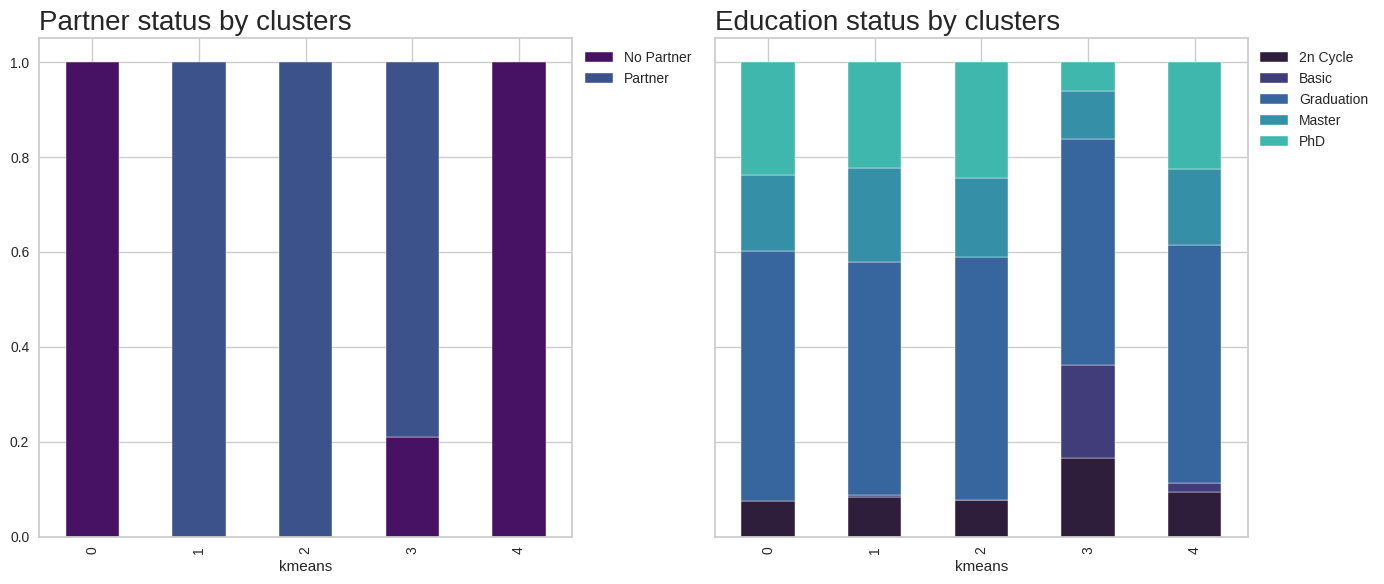

In [ ]:
group_by_partner = df_clustered.groupby('kmeans')['partner'].value_counts(normalize=True).unstack()
group_by_graduated = df_clustered.groupby('kmeans')['education'].value_counts(normalize=True).unstack()

fig, ax = plt.subplots(1,2, figsize=(14,6), sharey=True)

group_by_partner.plot(kind='bar',
                      stacked=True,
                     ax=ax[0])

ax[0].set_title('Partner status by clusters', size=20, loc='left')
ax[0].legend(loc='upper left', bbox_to_anchor=(1, 1))

group_by_graduated.plot(kind='bar',
                      stacked=True,
                     ax=ax[1],
                       color=sns.color_palette('mako'))

ax[1].set_title('Education status by clusters', size=20, loc='left')
ax[1].legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()
plt.show()

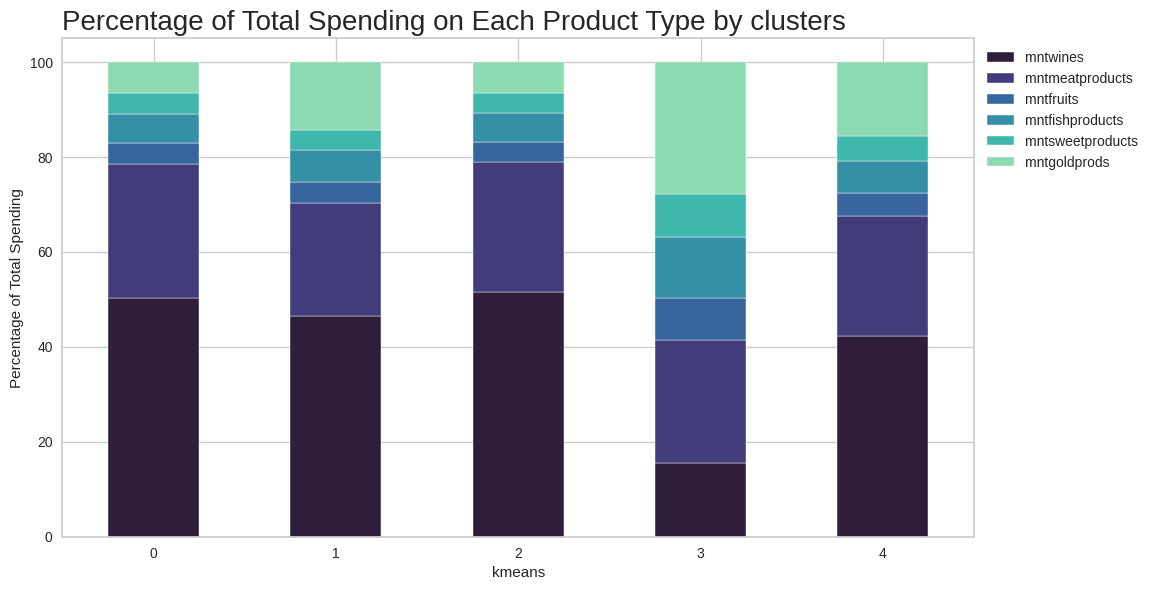

In [ ]:
prod_columns = ['mntwines','mntmeatproducts','mntfruits','mntfishproducts',
                'mntsweetproducts','mntgoldprods']

df_grouped = df_clustered.groupby('kmeans')[prod_columns].mean()

df_percentage = df_grouped.divide(df_grouped.sum(axis=1), axis=0) * 100

ax = df_percentage.plot(kind='bar', ylabel='Percentage of Total Spending',
                   figsize=(10, 6),
                   stacked=True,
                   color=sns.color_palette('mako',6))

ax.set_title('Percentage of Total Spending on Each Product Type by clusters', size=20, loc='left')

plt.tight_layout()
plt.xticks(rotation=0)

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()

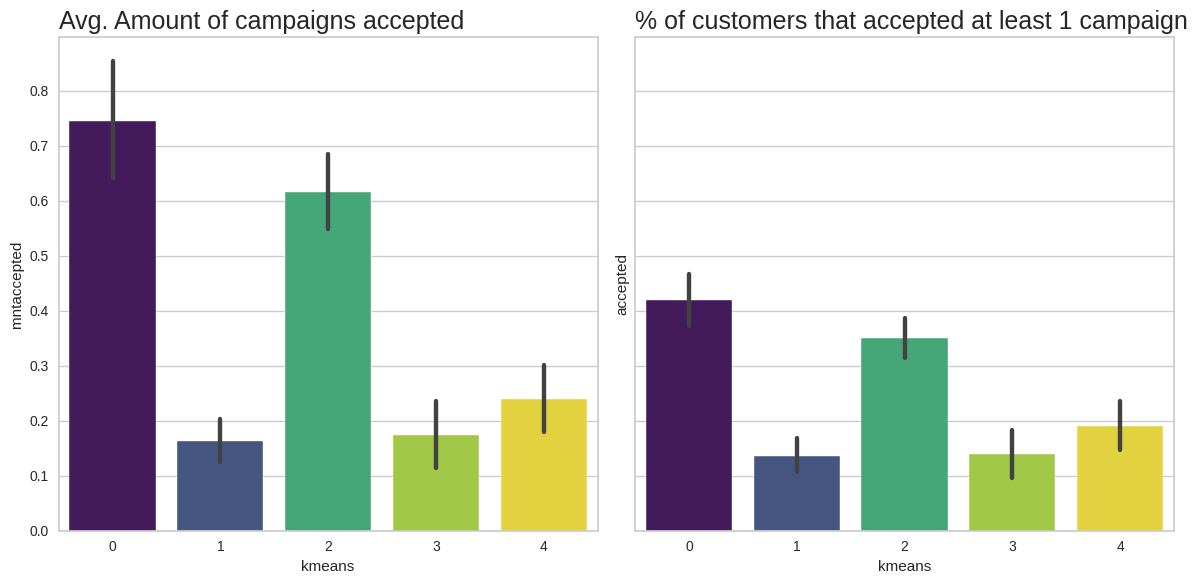

In [ ]:
avg_mntaccepted = df_clustered.groupby('kmeans')['mntaccepted'].mean()
percentage_accepted = df_clustered.groupby('kmeans')['accepted'].mean()

fig , ax = plt.subplots(1, 2, figsize=(12,6), sharey=True)

sns.barplot(data=df_clustered, x='kmeans', y='mntaccepted',
                     ax=ax[0])
ax[0].set_title('Avg. Amount of campaigns accepted', size=18, loc='left')

sns.barplot(data=df_clustered, x='kmeans', y='accepted',
                     ax=ax[1])
ax[1].set_title('% of customers that accepted at least 1 campaign', size=18, loc='left')

plt.tight_layout()
plt.show()

In [ ]:
# 0 if Single and 1 if Inrelationship
maritalstatus_dictionary = {'Single':1 , 'Inrelationship':2}
df_clustered =  df_clustered.replace({'marital_status':maritalstatus_dictionary})

In [ ]:
# # Num of Children in each cluster
# print(df_clustered.groupby(['kmeans','younghome']).size())
# print('*'*50,'green')
# familySizecount = sns.countplot(x=df_clustered['younghome'],hue=df_clustered['kmeans'])
# familySizecount.set_title("Num of Children In Each Cluster", size=15)

In [ ]:
df_clustered['younghome']=df_clustered.kidhome+df_clustered.teenhome
df_clustered['partner'] = df_clustered['partner'].replace({'Partner': 1, 'No Partner': 0})
df_clustered['FamilySize'] = df_clustered.younghome + df_clustered.partner

In [ ]:
print(df_clustered.groupby(['kmeans','FamilySize']).size())

familySizecount = sns.countplot(x=df_clustered['FamilySize'],hue=df_clustered['kmeans'])
familySizecount.set_title("FamilySize In Each Cluster", size=15)

kmeans  younghome
0       0            202
        1            193
        2             34
        3              3
1       0             36
        1            263
        2            167
        3             20
2       0            302
        1            365
        2             87
        3              9
3       0             56
        1            140
        2             31
        3              2
4       0             37
        1            156
        2             97
        3             16
dtype: int64


Text(0.5, 1.0, 'Num of Children In Each Cluster Each Cluster')

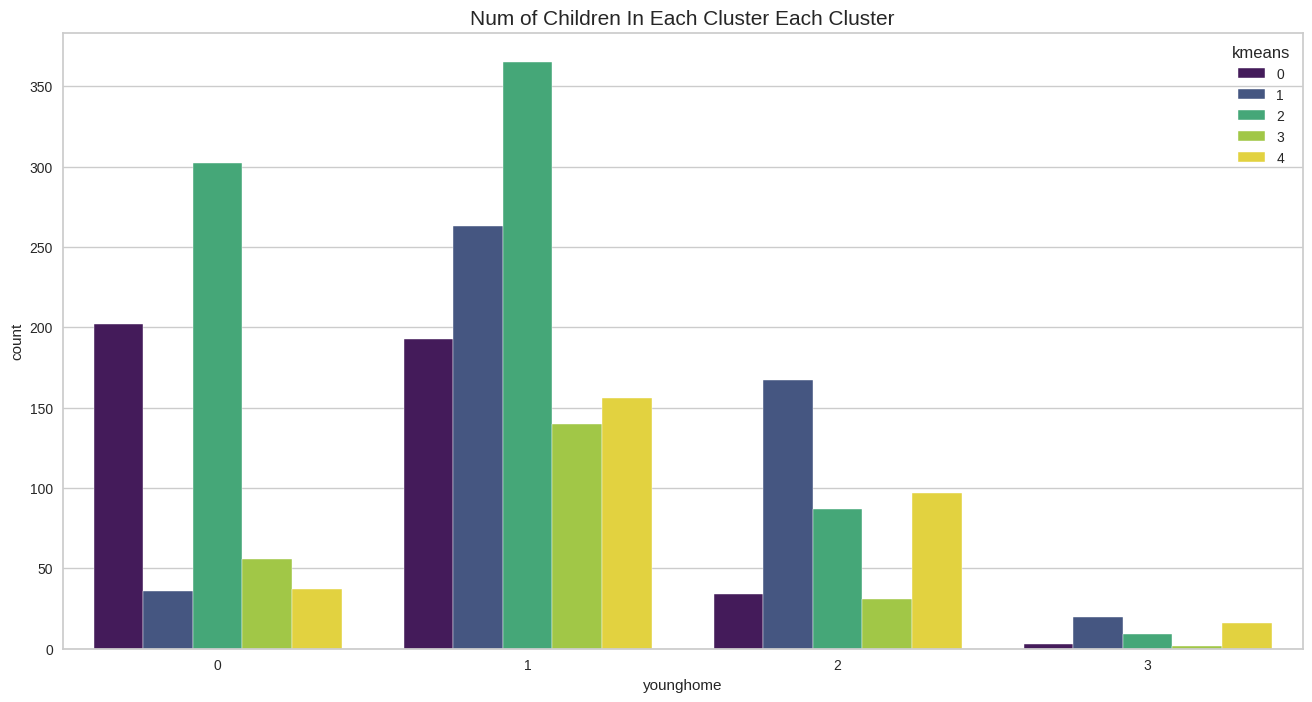

In [ ]:
print(df_clustered.groupby(['kmeans','younghome']).size())

familySizecount = sns.countplot(x=df_clustered['younghome'],hue=df_clustered['kmeans'])
familySizecount.set_title("Num of Children In Each Cluster Each Cluster", size=15)

In [ ]:
df_clustered["mntotal"] = df_clustered["mntwines"]+ df_clustered["mntfruits"]+ df_clustered["mntmeatproducts"]+df_clustered["mntfishproducts"]+ df_clustered["mntsweetproducts"]+ df_clustered["mntgoldprods"]

In [ ]:
df_clustered

,year_birth,education,marital_status,income,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,complain,response,partner,mnttotal,mntaccepted,accepted,age,age_category,younghome,kmeans,FamilySize,mntotal
0,1957.0,Graduation,1,58138.0,2012-09-04,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10.0,4.0,7.0,0.0,1,0,1617.0,1,1,57.0,adult,0,0,0,1617.0
1,1954.0,Graduation,1,46344.0,2014-03-08,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1.0,2.0,5.0,0.0,0,0,27.0,0,0,60.0,adult,2,1,2,27.0
2,1965.0,Graduation,Together,71613.0,2013-08-21,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2.0,10.0,4.0,0.0,0,1,776.0,0,0,49.0,adult,0,3,1,776.0
3,1984.0,Graduation,Together,26646.0,2014-02-10,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0.0,4.0,6.0,0.0,0,1,53.0,0,0,30.0,young,1,1,2,53.0
4,1981.0,PhD,Married,58293.0,2014-01-19,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3.0,6.0,5.0,0.0,0,1,422.0,0,0,33.0,adult,1,2,2,422.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2207,1967.0,Graduation,Married,61223.0,2013-06-13,46.0,709.0,43.0,182.0,42.0,118.0,227.0,2.0,9.0,3.0,4.0,5.0,0.0,0,1,1321.0,0,0,47.0,adult,1,3,2,1321.0
2208,1946.0,PhD,Together,64014.0,2014-06-10,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2.0,5.0,7.0,0.0,0,1,444.0,1,1,68.0,elderly,3,2,4,444.0
2209,1981.0,Graduation,Divorced,56981.0,2014-01-25,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3.0,13.0,6.0,0.0,0,0,1241.0,1,1,33.0,adult,0,3,0,1241.0
2210,1956.0,Master,Together,69245.0,2014-01-24,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5.0,10.0,3.0,0.0,0,1,843.0,0,0,58.0,adult,1,3,2,843.0


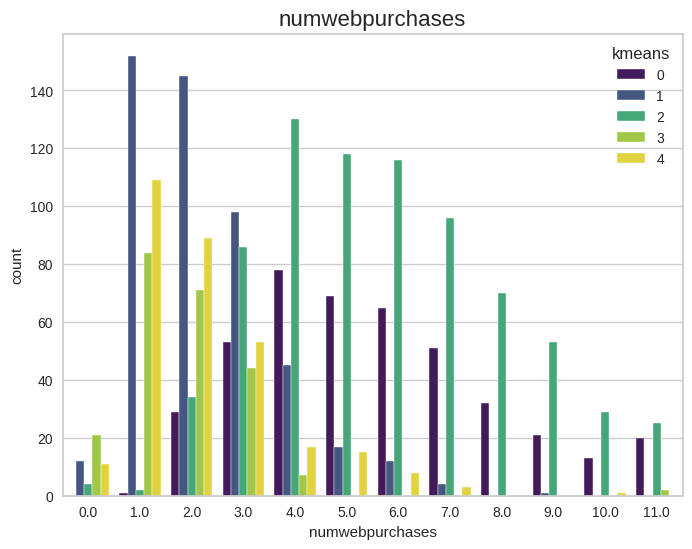

In [ ]:
plt.figure(figsize=(8, 6))  # Đặt kích thước hình cho mỗi biểu đồ
sns.countplot(x=df_clustered['numwebpurchases'], hue=df_clustered["kmeans"]).set_title(f'numwebpurchases', size=16)
plt.show()

In [ ]:
df_clustered['numcatalogpurchases']=df_clustered['numcatalogpurchases'].astype(int)

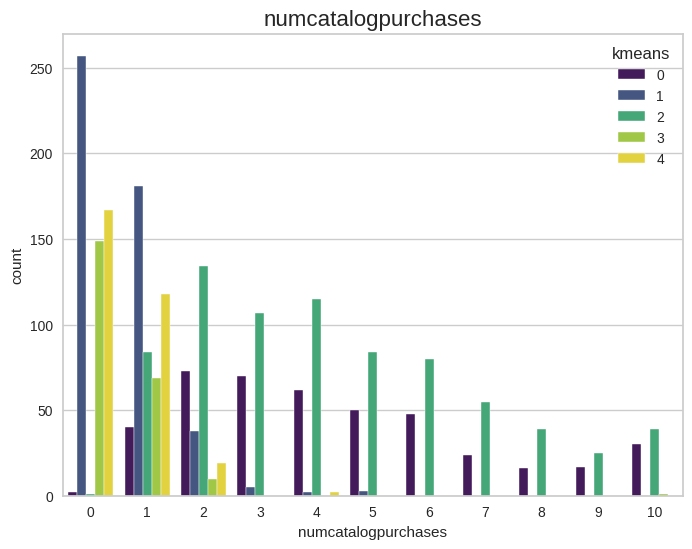

In [ ]:
plt.figure(figsize=(8, 6))  # Đặt kích thước hình cho mỗi biểu đồ
sns.countplot(x=df_clustered['numcatalogpurchases'], hue=df_clustered["kmeans"]).set_title(f'numcatalogpurchases', size=16)
plt.show()

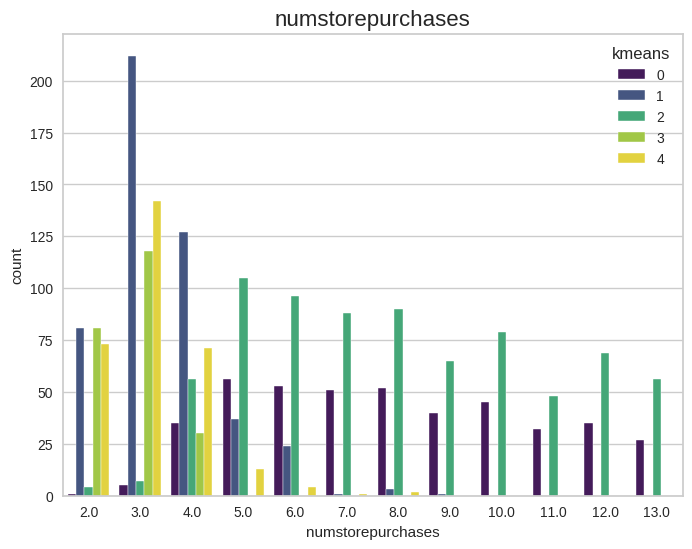

In [ ]:
plt.figure(figsize=(8, 6))  # Đặt kích thước hình cho mỗi biểu đồ
sns.countplot(x=df_clustered['numstorepurchases'], hue=df_clustered["kmeans"]).set_title(f'numstorepurchases', size=16)
plt.show()

In [ ]:
print('Num of discount buying for each Cluster :','green')
print(df_clustered.groupby(['kmeans'])['numcatnumdealspurchases'].agg('sum'))
print('*'*50,'green')
sns.violinplot(x=df_clustered["kmeans"], y=df_clustered["numcatnumdealspurchases"])

In [ ]:
df_clustered

,id,year_birth,education,marital_status,income,kidhome,teenhome,dt_customer,recency,mntwines,mntfruits,mntmeatproducts,mntfishproducts,mntsweetproducts,mntgoldprods,numdealspurchases,numwebpurchases,numcatalogpurchases,numstorepurchases,numwebvisitsmonth,acceptedcmp3,acceptedcmp4,acceptedcmp5,acceptedcmp1,acceptedcmp2,complain,z_costcontact,z_revenue,response,graduated,partner,mnttotal,mntaccepted,accepted,age,age_category,kmeans,younghome,FamilySize
0,5524.0,1957.0,Graduation,1,58138.0,0,0,2012-09-04,58.0,635.0,88.0,546.0,172.0,88.0,88.0,3.0,8.0,10,4.0,7.0,0,0,0,0,0,0.0,3,11,1,Graduated,0,1617.0,1.0,1,57.0,adult,0,0,0
1,2174.0,1954.0,Graduation,1,46344.0,1,1,2014-03-08,38.0,11.0,1.0,6.0,2.0,1.0,6.0,2.0,1.0,1,2.0,5.0,0,0,0,0,0,0.0,3,11,0,Graduated,0,27.0,0.0,0,60.0,adult,4,2,2
2,4141.0,1965.0,Graduation,Together,71613.0,0,0,2013-08-21,26.0,426.0,49.0,127.0,111.0,21.0,42.0,1.0,8.0,2,10.0,4.0,0,0,0,0,0,0.0,3,11,0,Graduated,1,776.0,0.0,0,49.0,adult,2,0,1
3,6182.0,1984.0,Graduation,Together,26646.0,1,0,2014-02-10,26.0,11.0,4.0,20.0,10.0,3.0,5.0,2.0,2.0,0,4.0,6.0,0,0,0,0,0,0.0,3,11,0,Graduated,1,53.0,0.0,0,30.0,young,1,1,2
4,5324.0,1981.0,PhD,Married,58293.0,1,0,2014-01-19,94.0,173.0,43.0,118.0,46.0,27.0,15.0,5.0,5.0,3,6.0,5.0,0,0,0,0,0,0.0,3,11,0,Graduated,1,422.0,0.0,0,33.0,adult,2,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2211,10870.0,1967.0,Graduation,Married,61223.0,0,1,2013-06-13,46.0,709.0,43.0,182.0,42.0,118.0,227.0,2.0,9.0,3,4.0,5.0,0,0,0,0,0,0.0,3,11,0,Graduated,1,1341.0,0.0,0,47.0,adult,2,1,2
2212,4001.0,1946.0,PhD,Together,64014.0,2,1,2014-06-10,56.0,406.0,0.0,30.0,0.0,0.0,8.0,7.0,8.0,2,5.0,7.0,0,0,0,1,0,0.0,3,11,0,Graduated,1,444.0,1.0,1,68.0,elderly,2,3,4
2213,7270.0,1981.0,Graduation,Divorced,56981.0,0,0,2014-01-25,91.0,908.0,48.0,217.0,32.0,12.0,24.0,1.0,2.0,3,13.0,6.0,0,1,0,0,0,0.0,3,11,0,Graduated,0,1241.0,1.0,1,33.0,adult,0,0,0
2214,8235.0,1956.0,Master,Together,69245.0,0,1,2014-01-24,8.0,428.0,30.0,214.0,80.0,30.0,61.0,2.0,6.0,5,10.0,3.0,0,0,0,0,0,0.0,3,11,0,Graduated,1,843.0,0.0,0,58.0,adult,2,1,2


************************************************** green


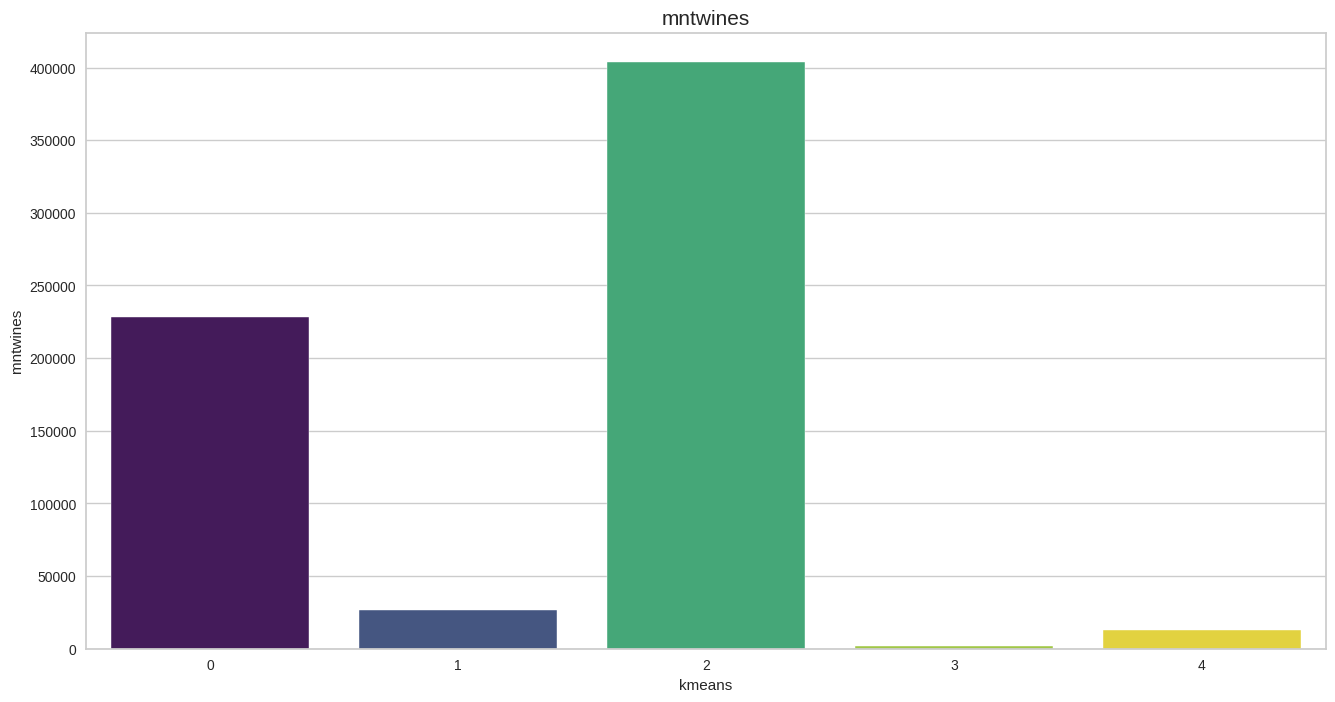

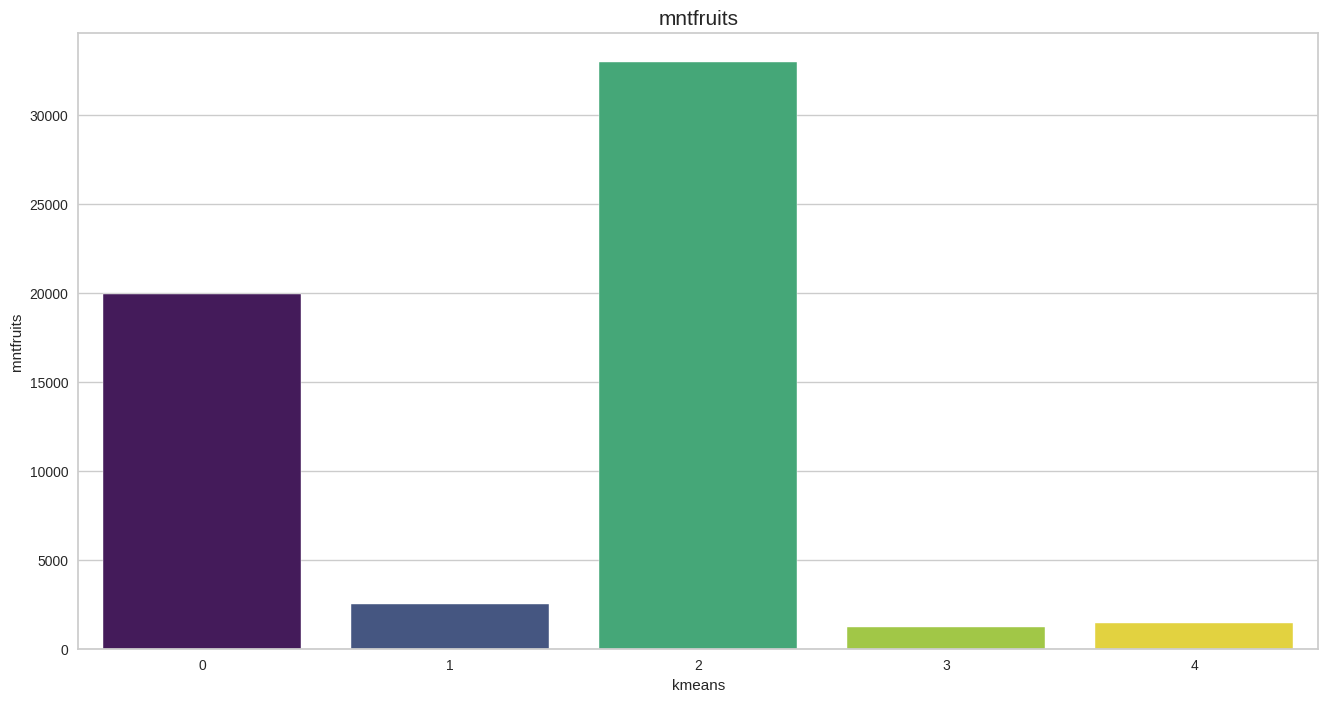

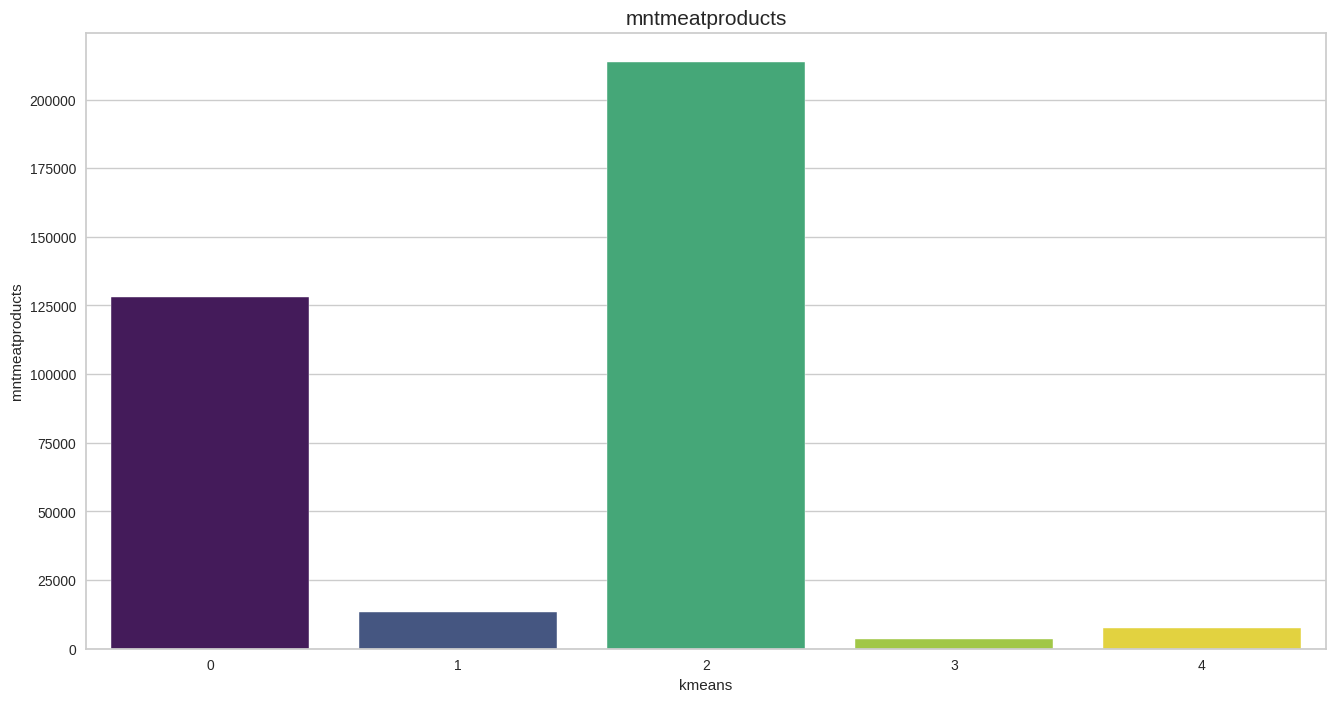

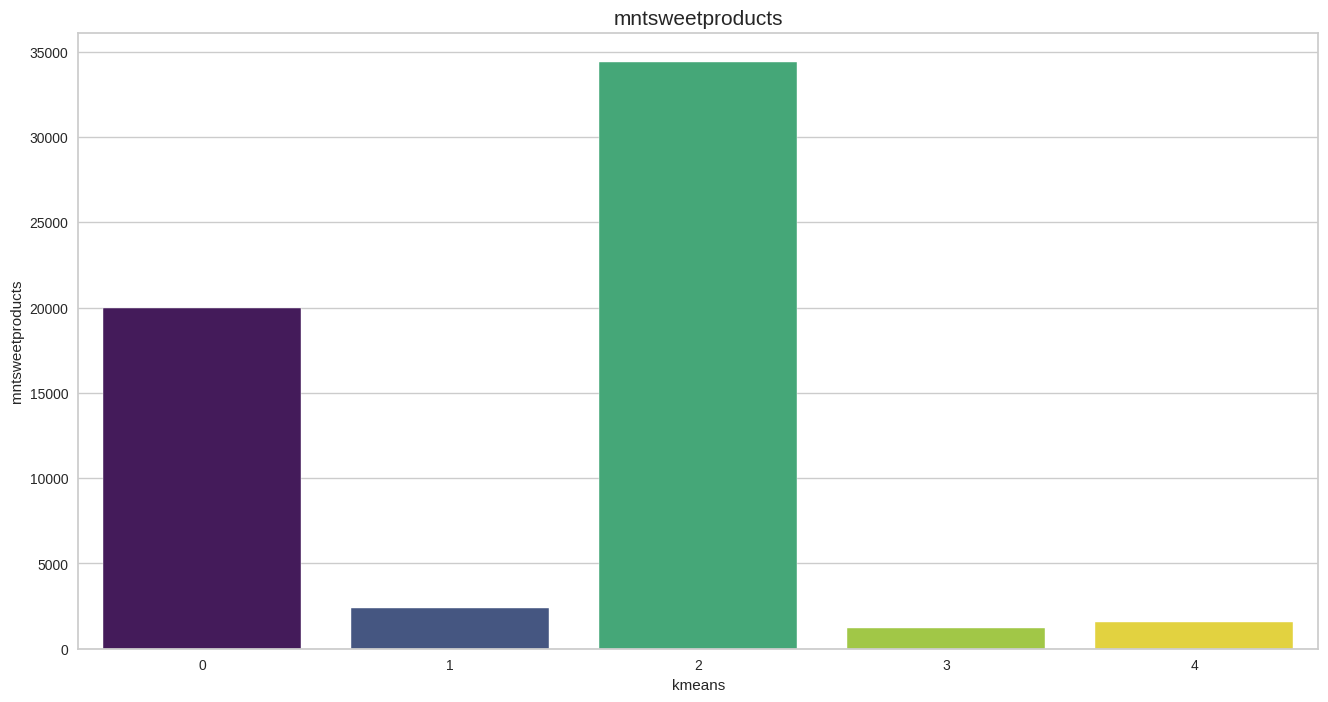

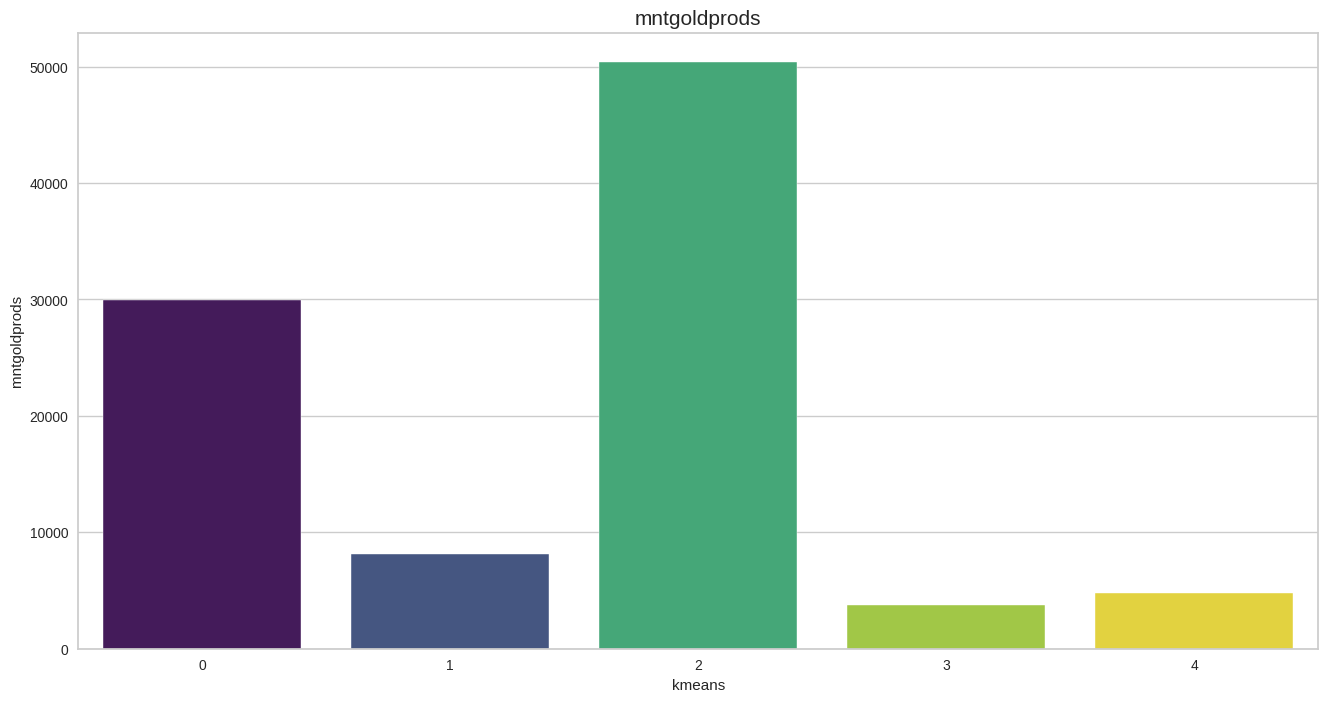

In [ ]:
df_buying=df_clustered.groupby(['kmeans'])['mntwines','mntfruits','mntmeatproducts','mntsweetproducts','mntgoldprods'].agg('sum')
print('*'*50,'green')
Products = ['mntwines','mntfruits','mntmeatproducts','mntsweetproducts','mntgoldprods']
for i in Products:
    plt.figure()
    sns.barplot(y=df_buying[i],x=df_buying.index).set_title(f'{i}',size=15)
    plt.show()